In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.size"] =14

In [2]:
df = pd.read_csv("./cost_of_living_us.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31420 non-null

In [6]:
df.dropna(inplace=True)
print(df.shape)

(31420, 15)


In [27]:
family_income = np.array(df["median_family_income"])
cost_of_living = np.array(df["total_cost"])
states = np.array(df["state"])

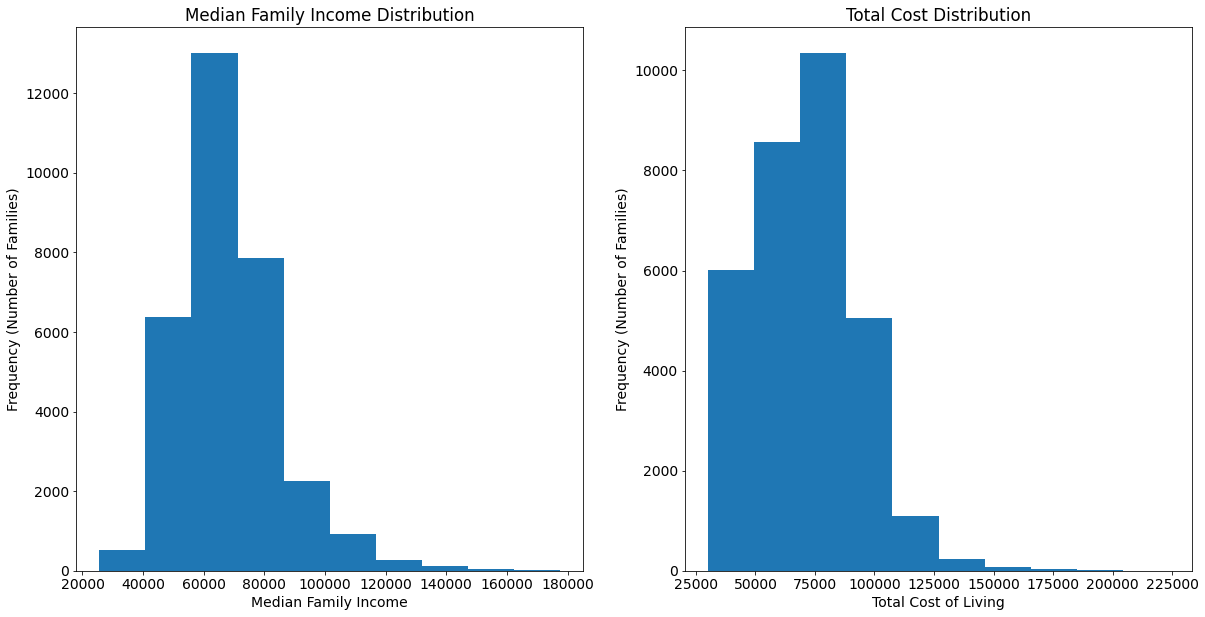

In [39]:
fig, axs = plt.subplots(1, 2, figsize =(20, 10))
axs[0].hist(family_income)
axs[0].set_xlabel("Median Family Income")
axs[0].set_ylabel("Frequency (Number of Families)")
axs[0].set_title("Median Family Income Distribution")
axs[1].hist(cost_of_living)
axs[1].set_xlabel("Total Cost of Living")
axs[1].set_ylabel("Frequency (Number of Families)")
axs[1].set_title("Total Cost Distribution")
plt.show()

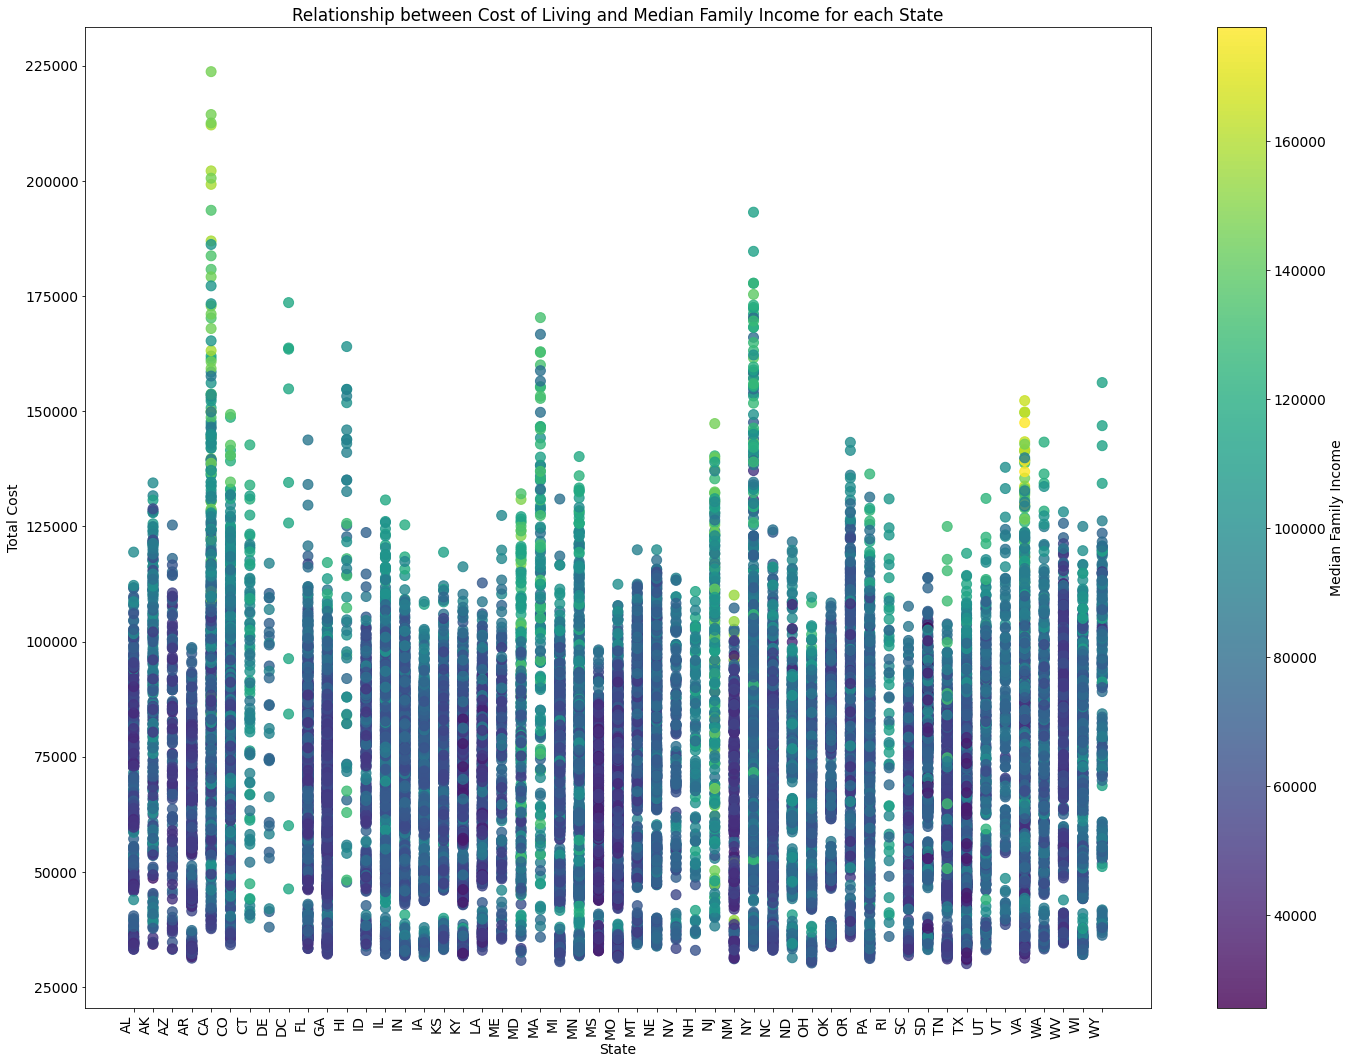

In [40]:
plt.figure(figsize=(20, 15))
plt.scatter(states, cost_of_living, c=family_income, cmap='viridis', s=100, alpha=0.8)
plt.colorbar(label='Median Family Income')
plt.xlabel('State')
plt.ylabel('Total Cost')
plt.title('Relationship between Cost of Living and Median Family Income for each State')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

## Analysis based on Family Size

In [47]:
metro_family_income = np.array(df[df["isMetro"] == True]["median_family_income"])
rural_family_income = np.array(df[df["isMetro"] == False]["median_family_income"])
metro_cost_of_living = np.array(df[df["isMetro"] == True]["total_cost"])
rural_cost_of_living = np.array(df[df["isMetro"] == False]["total_cost"])

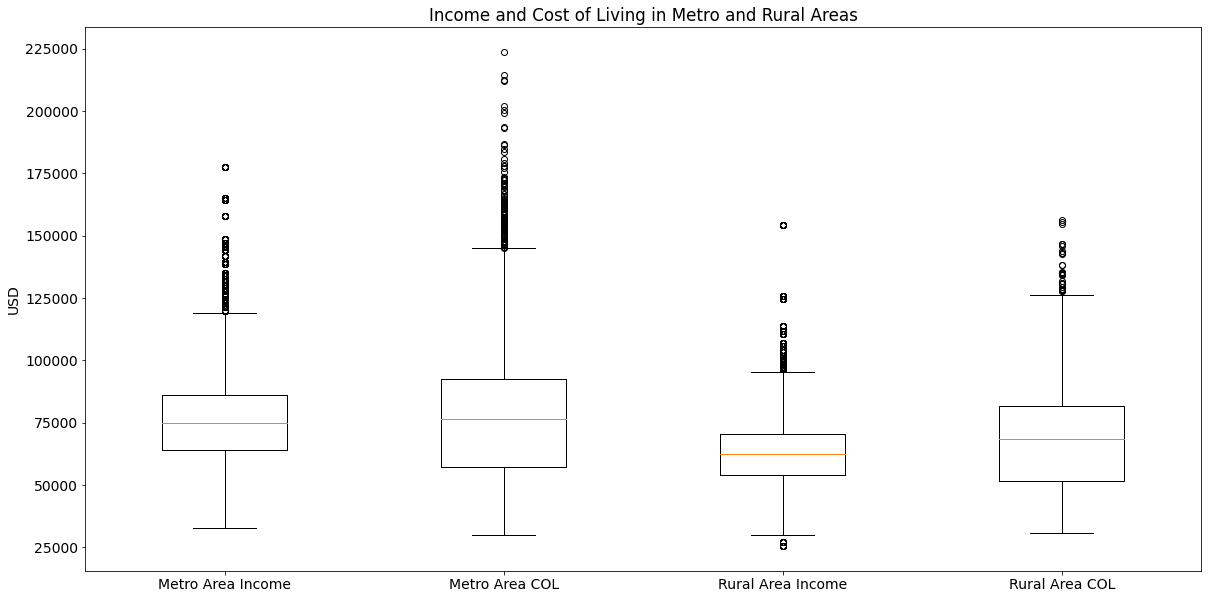

In [50]:
plt.figure(figsize=(20, 10))
plt.boxplot([metro_family_income, metro_cost_of_living, rural_family_income, rural_cost_of_living])
plt.ylabel("USD")
plt.xticks([1, 2, 3, 4], labels=["Metro Area Income", "Metro Area COL", "Rural Area Income", "Rural Area COL"])
plt.title("Income and Cost of Living in Metro and Rural Areas")
plt.show()

In [71]:
family_size = ["1p0c", "1p1c", "2p0c", "1p2c", "2p1c", "1p3c", "2p2c", "1p4c", "2p3c", "2p4c"]

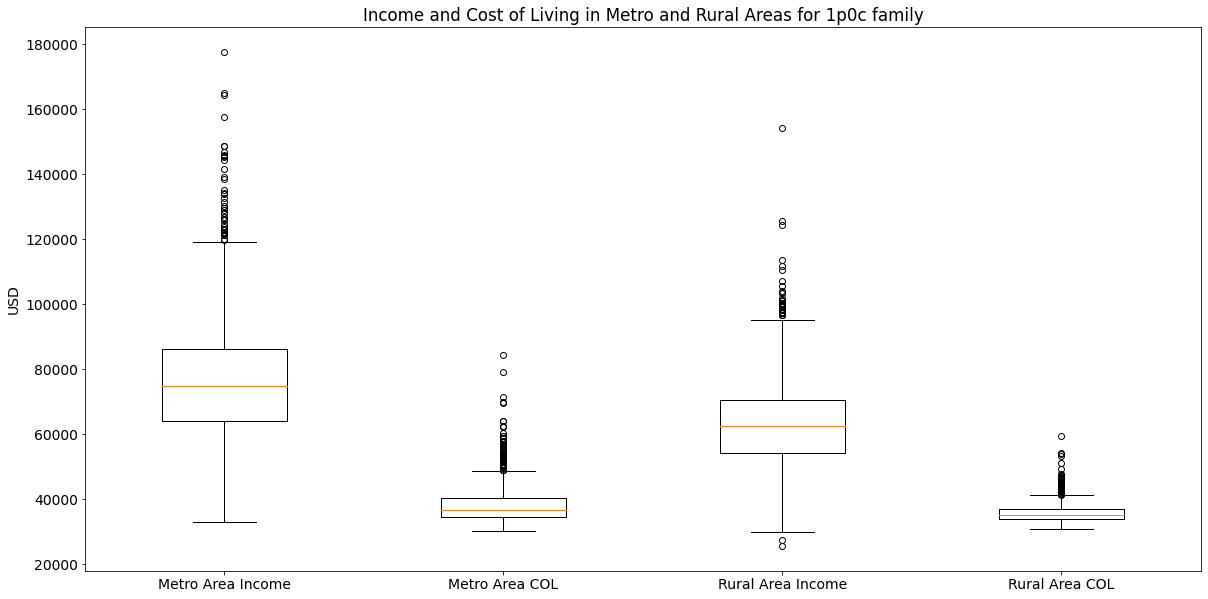

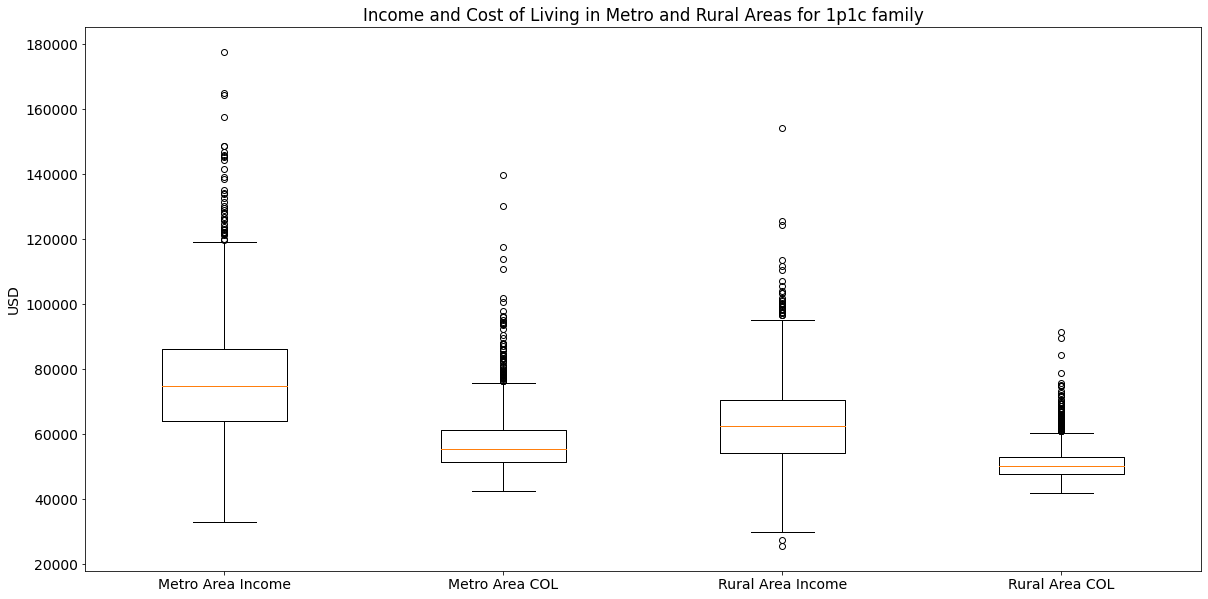

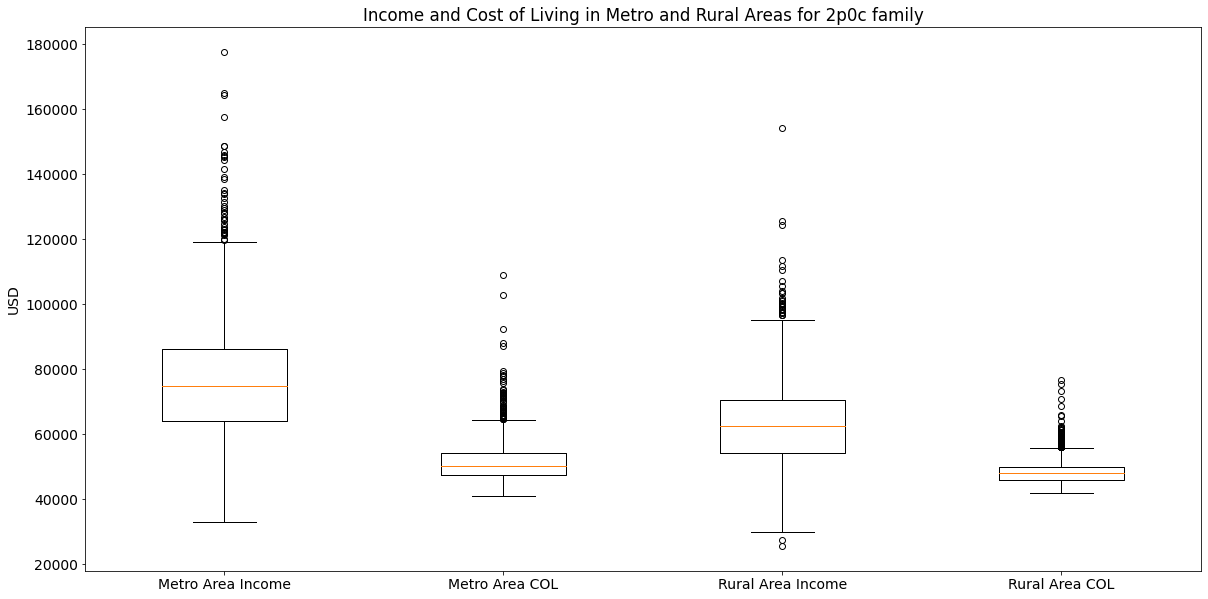

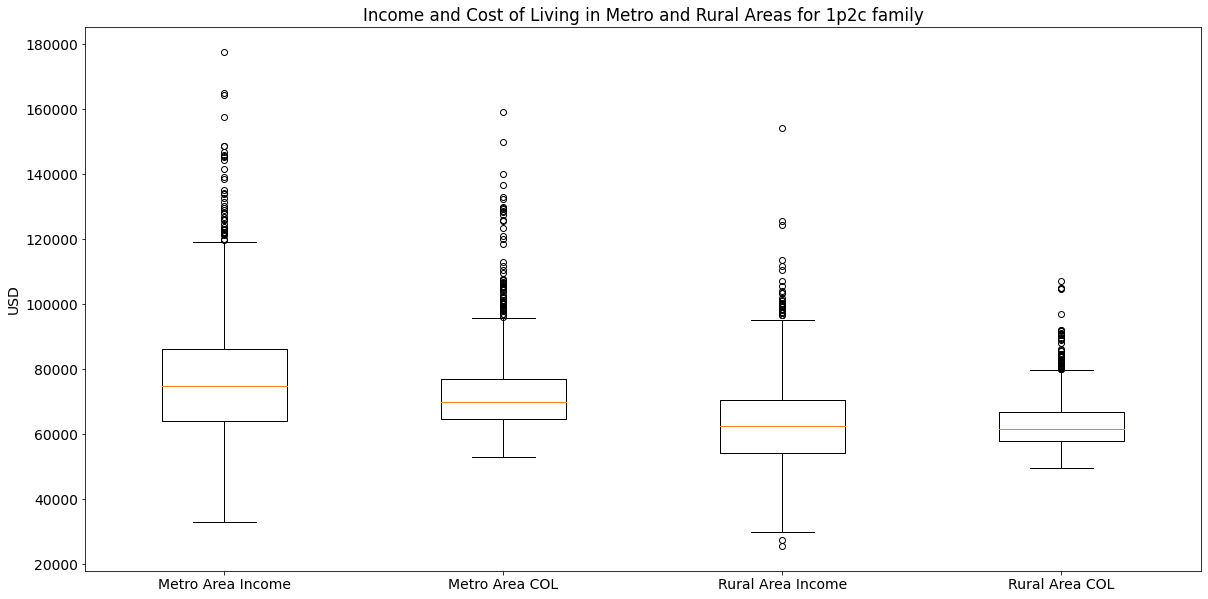

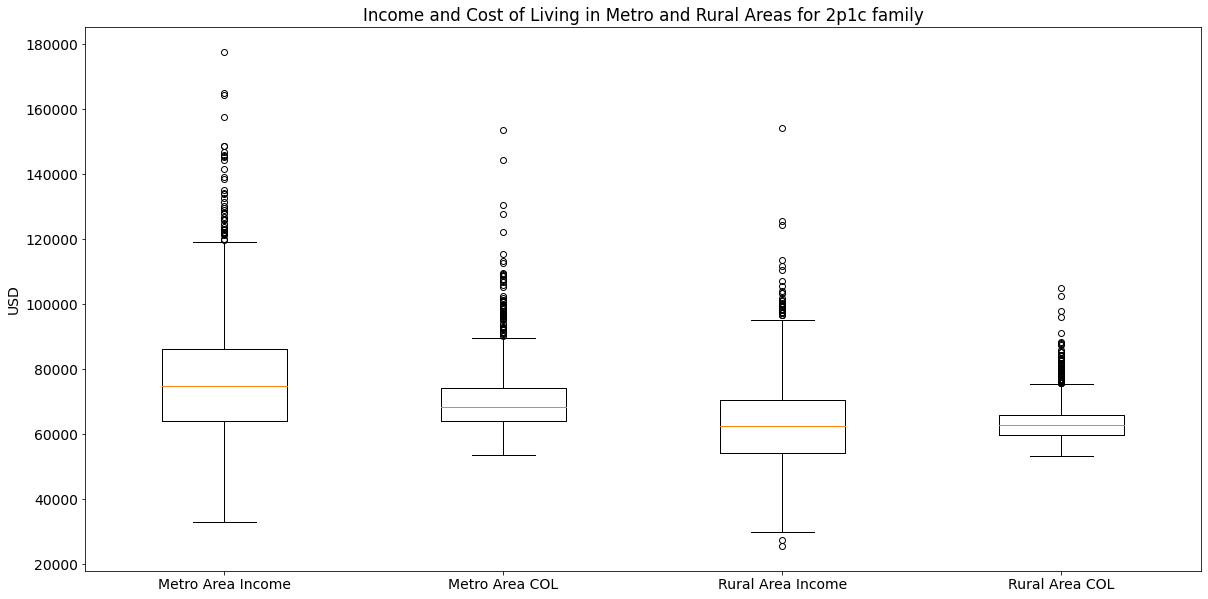

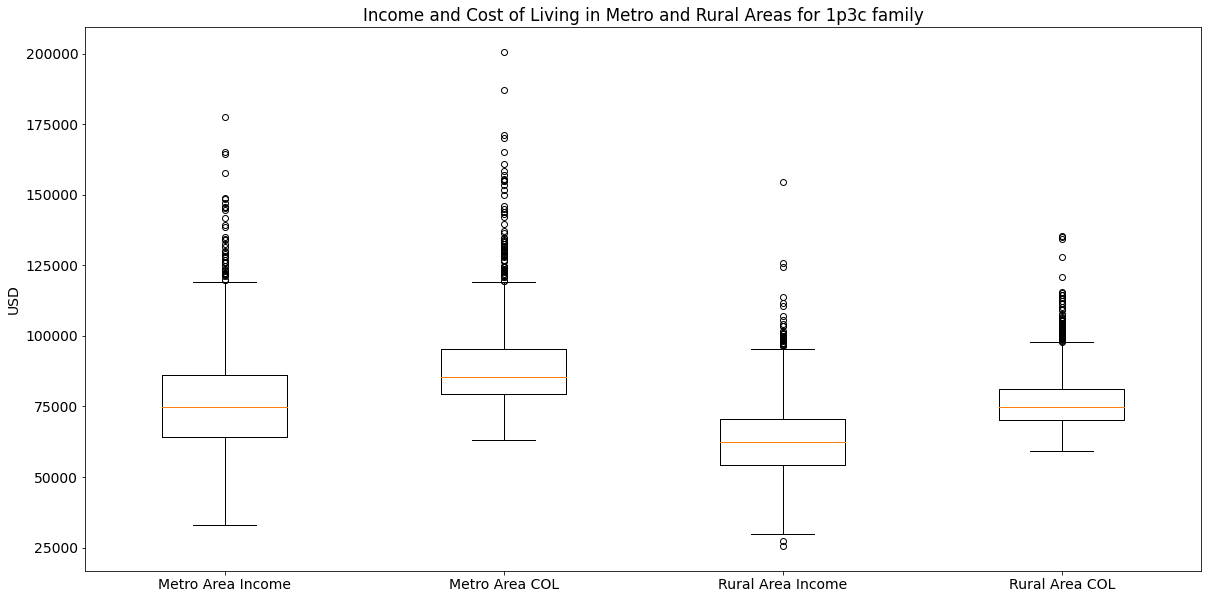

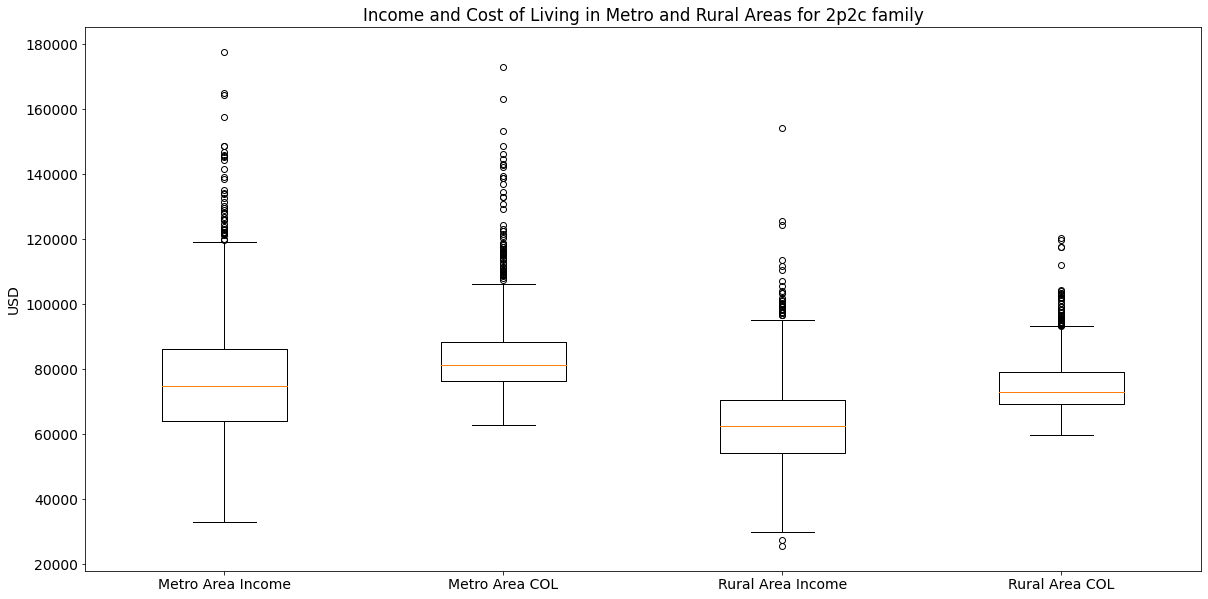

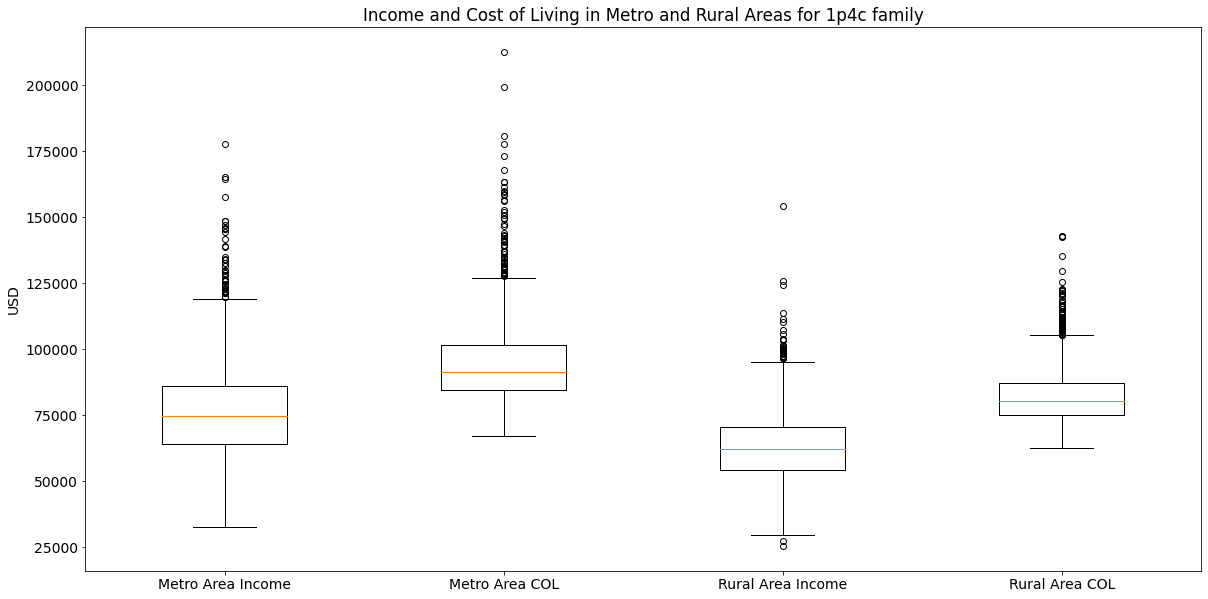

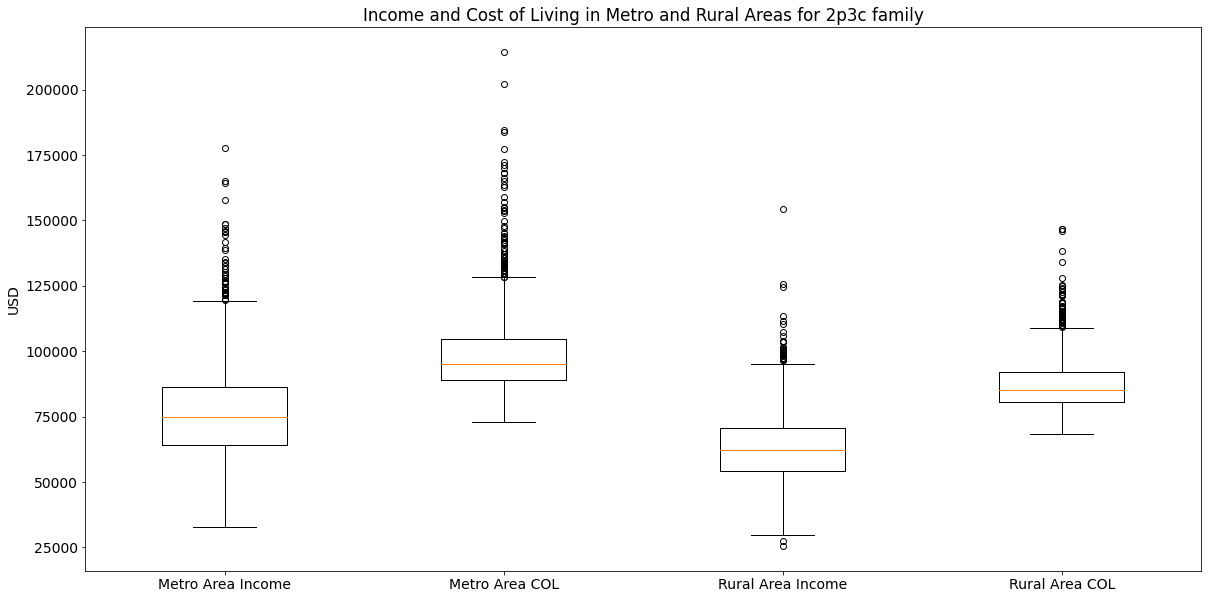

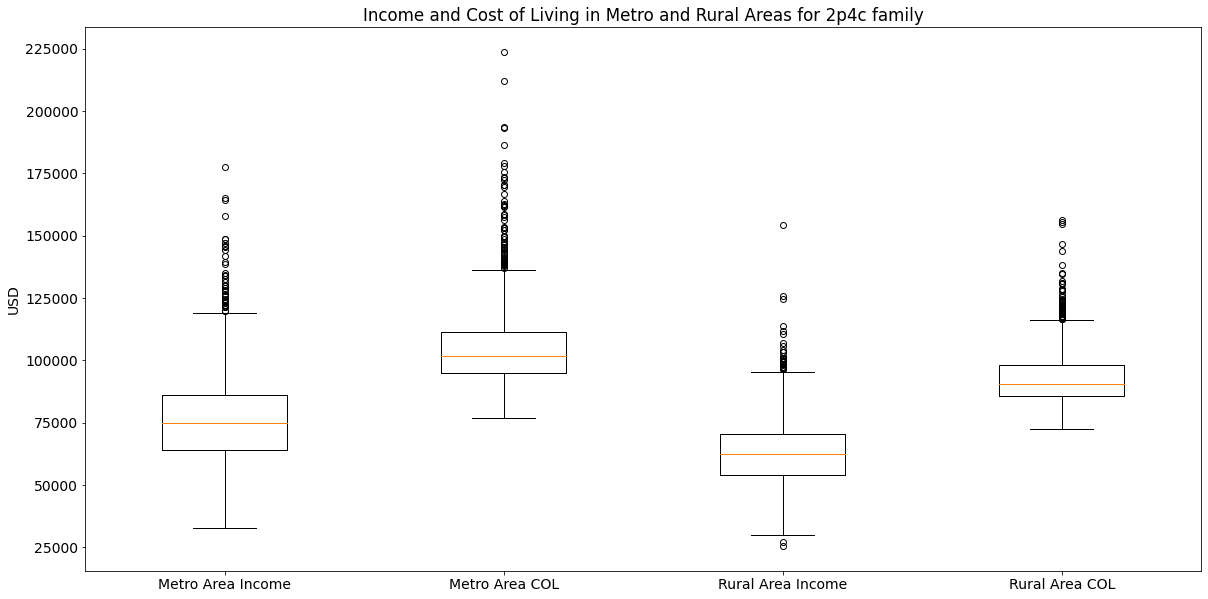

In [72]:
for fs in family_size:
    metro_income = np.array(df[(df["isMetro"] == True) & (df["family_member_count"] == fs)]["median_family_income"])
    metro_col = np.array(df[(df["isMetro"] == True) & (df["family_member_count"] == fs)]["total_cost"])
    rural_income = np.array(df[(df["isMetro"] == False) & (df["family_member_count"] == fs)]["median_family_income"])
    rural_col = np.array(df[(df["isMetro"] == False) & (df["family_member_count"] == fs)]["total_cost"])
    plt.figure(figsize=(20, 10))
    plt.boxplot([metro_income, metro_col, rural_income, rural_col])
    plt.ylabel("USD")
    plt.xticks([1, 2, 3, 4], labels=["Metro Area Income", "Metro Area COL", "Rural Area Income", "Rural Area COL"])
    plt.title(f"Income and Cost of Living in Metro and Rural Areas for {fs} family")
    plt.show()

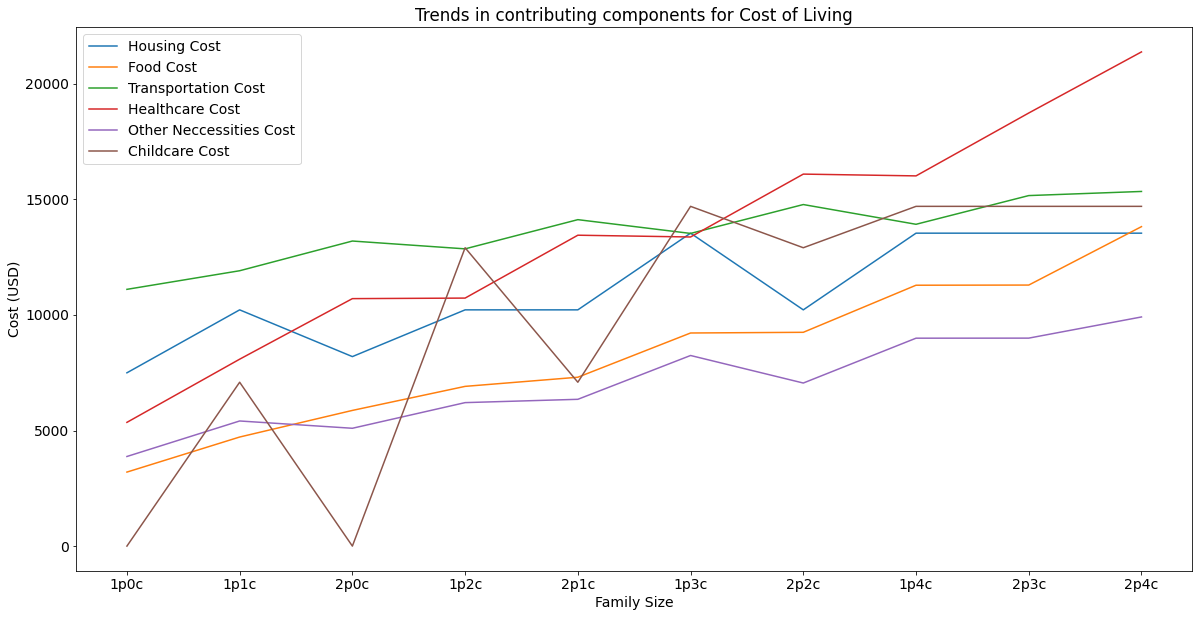

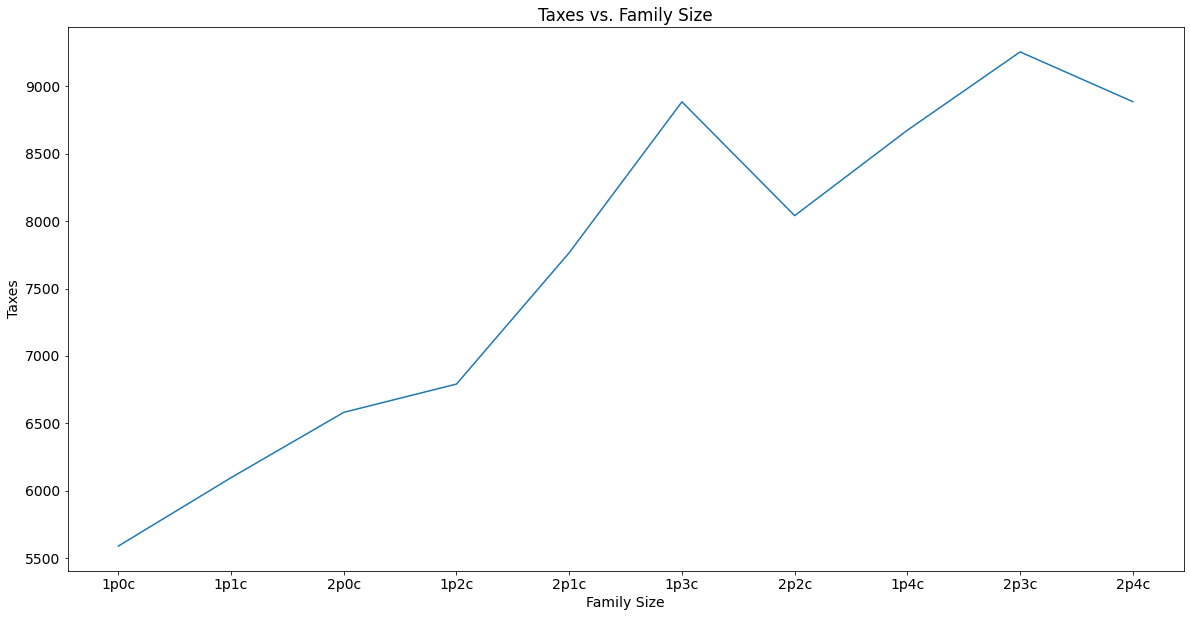

In [90]:
housing = []
food = []
transportation = []
healthcare = []
other = []
childcare = []
taxes = []

for fs in family_size:
    housing.append(np.array(df[(df["family_member_count"] == fs)]["housing_cost"]).mean())
    food.append(np.array(df[(df["family_member_count"] == fs)]["food_cost"]).mean())
    transportation.append(np.array(df[(df["family_member_count"] == fs)]["transportation_cost"]).mean())
    healthcare.append(np.array(df[(df["family_member_count"] == fs)]["healthcare_cost"]).mean())
    other.append(np.array(df[(df["family_member_count"] == fs)]["other_necessities_cost"]).mean())
    childcare.append(np.array(df[(df["family_member_count"] == fs)]["childcare_cost"]).mean())
    taxes.append(np.array(df[(df["family_member_count"] == fs)]["taxes"]).mean())

plt.figure(figsize=(20,10))
plt.plot(family_size, housing, label="Housing Cost")
plt.plot(family_size, food, label="Food Cost")
plt.plot(family_size, transportation, label="Transportation Cost")
plt.plot(family_size, healthcare, label="Healthcare Cost")
plt.plot(family_size, other, label="Other Neccessities Cost")
plt.plot(family_size, childcare, label="Childcare Cost")
plt.xlabel("Family Size")
plt.ylabel("Cost (USD)")
plt.legend()
plt.title("Trends in contributing components for Cost of Living")
plt.show()

plt.figure(figsize=(20,10))
plt.plot(family_size, taxes)
plt.xlabel("Family Size")
plt.ylabel("Taxes")
plt.title("Taxes vs. Family Size")
plt.show()

## Affordability Analysis

In [96]:
modified_df = df.assign(affordability_ratio=lambda x: x.median_family_income / x.total_cost)

In [130]:
most_affordable_counties_us = modified_df.nlargest(10, "affordability_ratio")
least_affordable_counties_us = modified_df.nsmallest(10, "affordability_ratio")

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,affordability_ratio
24229,2451,SD,False,"Todd County, SD",Todd County,2p4c,11328.000,15902.88840,13738.77960,31933.7052,9866.82492,12791.10240,7488.42192,103049.7192,25529.976562,0.247744
24228,2451,SD,False,"Todd County, SD",Todd County,2p3c,11328.000,12995.10000,14013.71640,27979.6236,8813.21856,12791.10240,7682.30496,95603.0628,25529.976562,0.267041
24224,2451,SD,False,"Todd County, SD",Todd County,1p4c,11328.000,12987.04560,12703.20360,23875.0140,8810.29980,12791.10240,6942.98436,89437.6524,25529.976562,0.285450
30169,3045,WV,False,"McDowell County, WV",McDowell County,2p4c,10092.000,12453.52920,15212.80680,37252.2744,8169.13404,13358.88960,13513.89840,110052.5268,32785.527344,0.297908
24227,2451,SD,False,"Todd County, SD",Todd County,2p2c,8628.000,10643.66016,14092.26360,24025.5408,6982.88232,11023.97532,6951.14868,82347.4692,25529.976562,0.310027
24223,2451,SD,False,"Todd County, SD",Todd County,1p3c,11328.000,10609.74540,12763.64760,19920.9336,7948.91088,12791.10240,6768.89064,82131.2280,25529.976562,0.310844
30168,3045,WV,False,"McDowell County, WV",McDowell County,2p3c,10092.000,10176.44460,14538.01920,32618.6016,7344.05712,13358.88960,12653.39760,100781.4144,32785.527344,0.325313
4169,423,GA,False,"Clay County, GA",Clay County,2p4c,11124.000,13663.04400,13749.12360,20839.8060,8981.32320,9106.50660,6071.71872,83535.5220,27326.921875,0.327129
18319,1858,NY,True,"New York, NY HUD Metro FMR Area",Bronx County,2p4c,25430.868,15051.74760,6406.67136,19116.6384,14668.44840,38123.74200,21580.07040,140378.1960,48566.816406,0.345971
30164,3045,WV,False,"McDowell County, WV",McDowell County,1p4c,10092.000,10170.13692,13473.86160,27893.4840,7341.77124,13358.88960,11881.85964,94212.0060,32785.527344,0.347997


In [163]:
def affordability_graphs(data, region, rank, fam_size):
    plt.figure(figsize=(20,10))
    sns.barplot(data=data, x="county", y="affordability_ratio", hue="isMetro", dodge=False, ci=None)
    plt.title(f"{rank} Affordable Counties in {region}   {fam_size}")
    plt.xticks(rotation=90)
    plt.show()

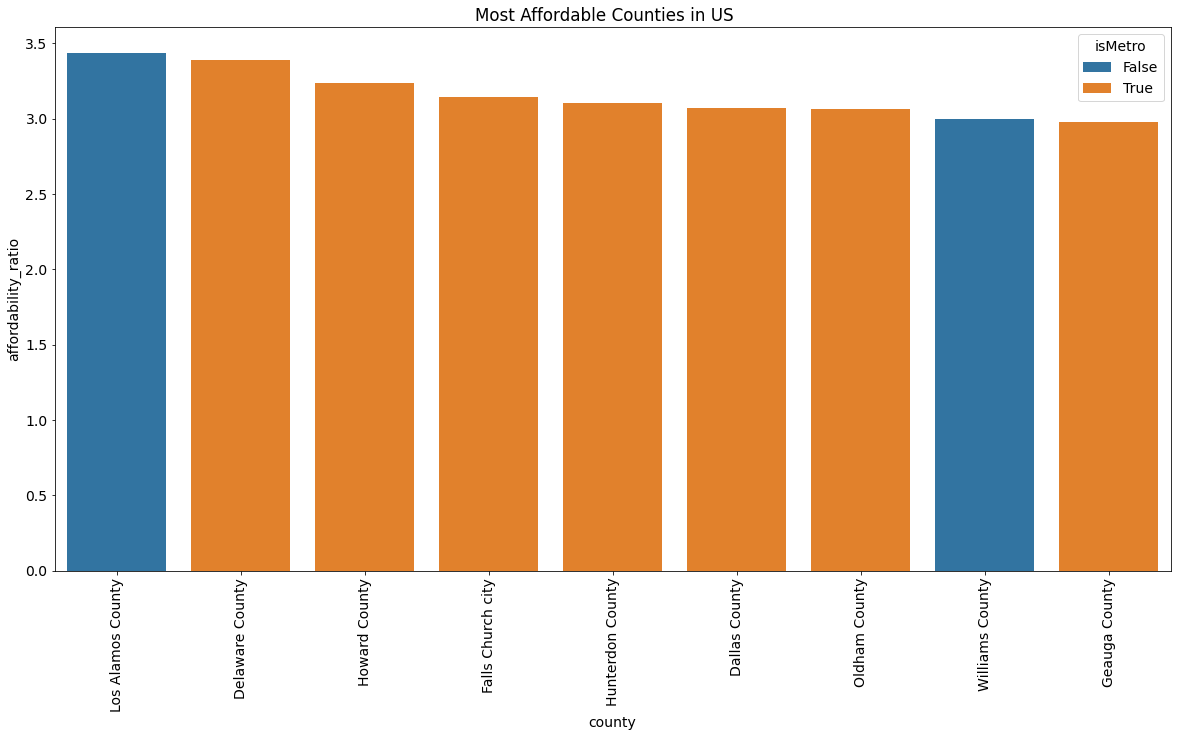

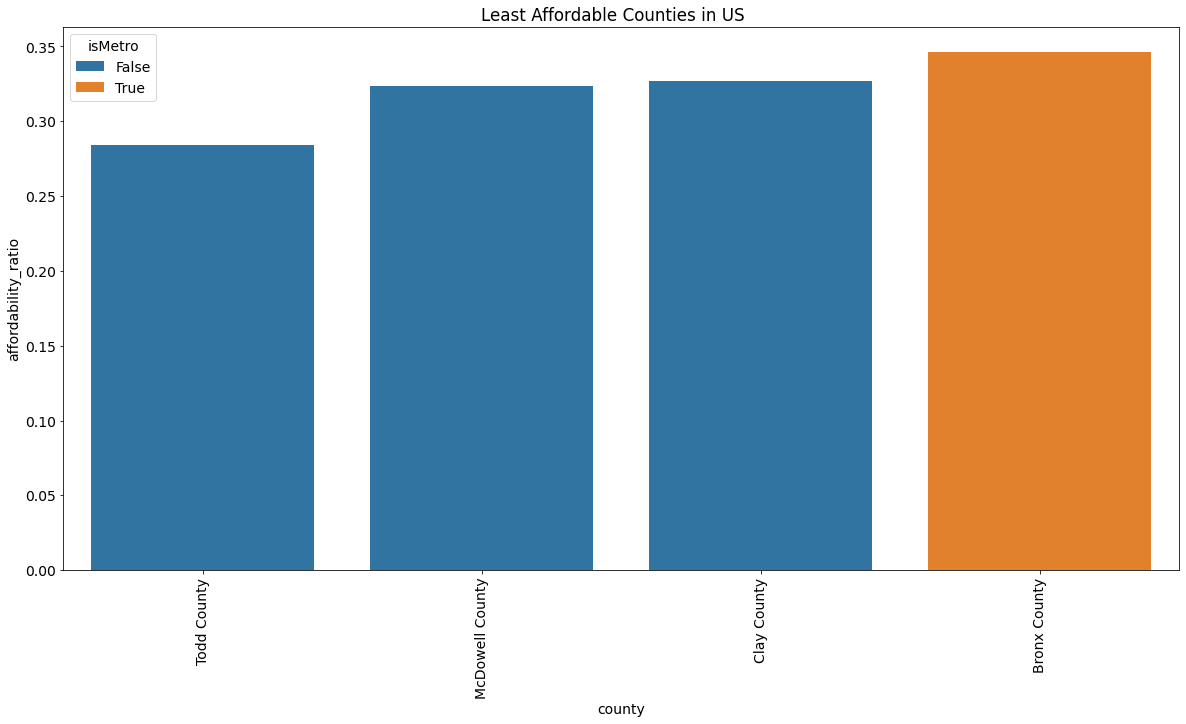

In [164]:
affordability_graphs(most_affordable_counties_us, "US", "Most", "")
affordability_graphs(least_affordable_counties_us, "US", "Least", "")

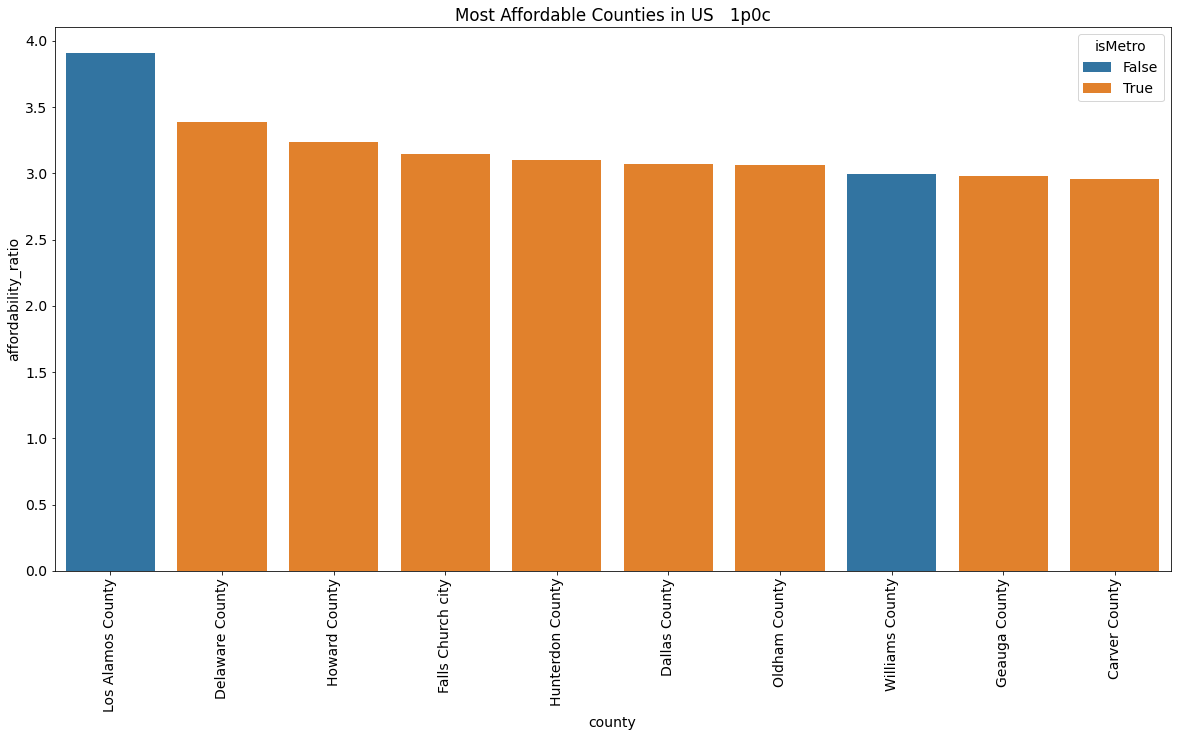

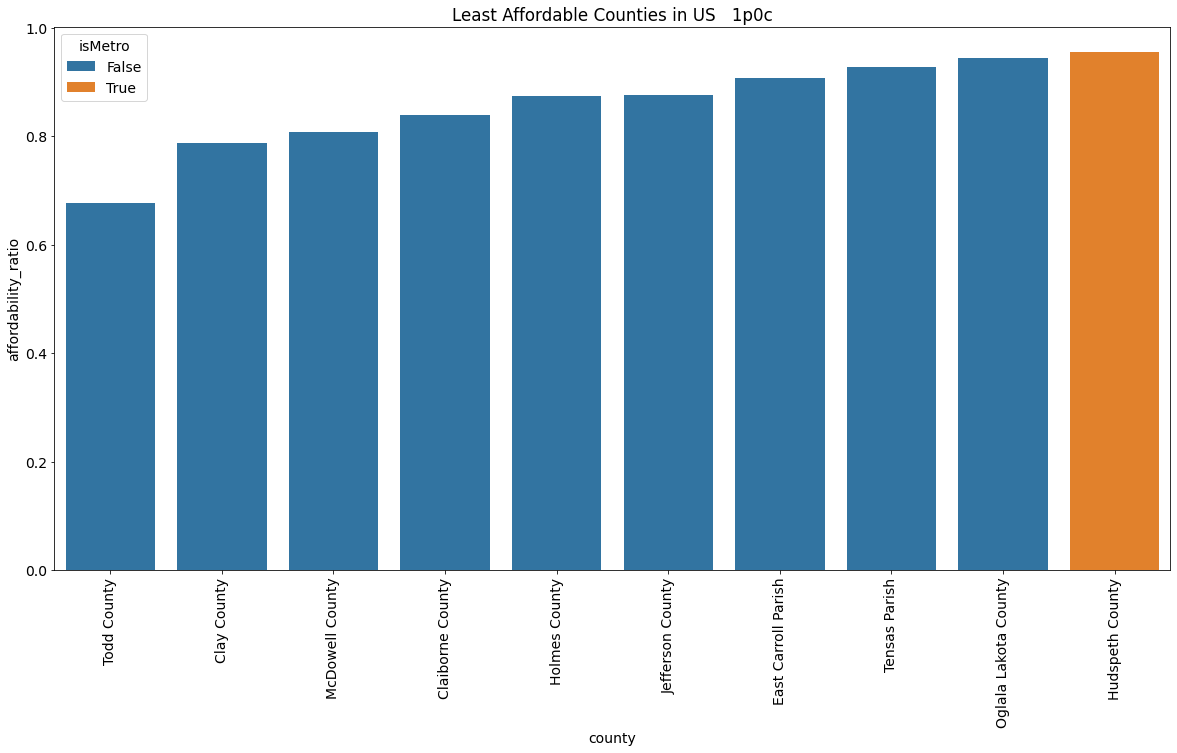

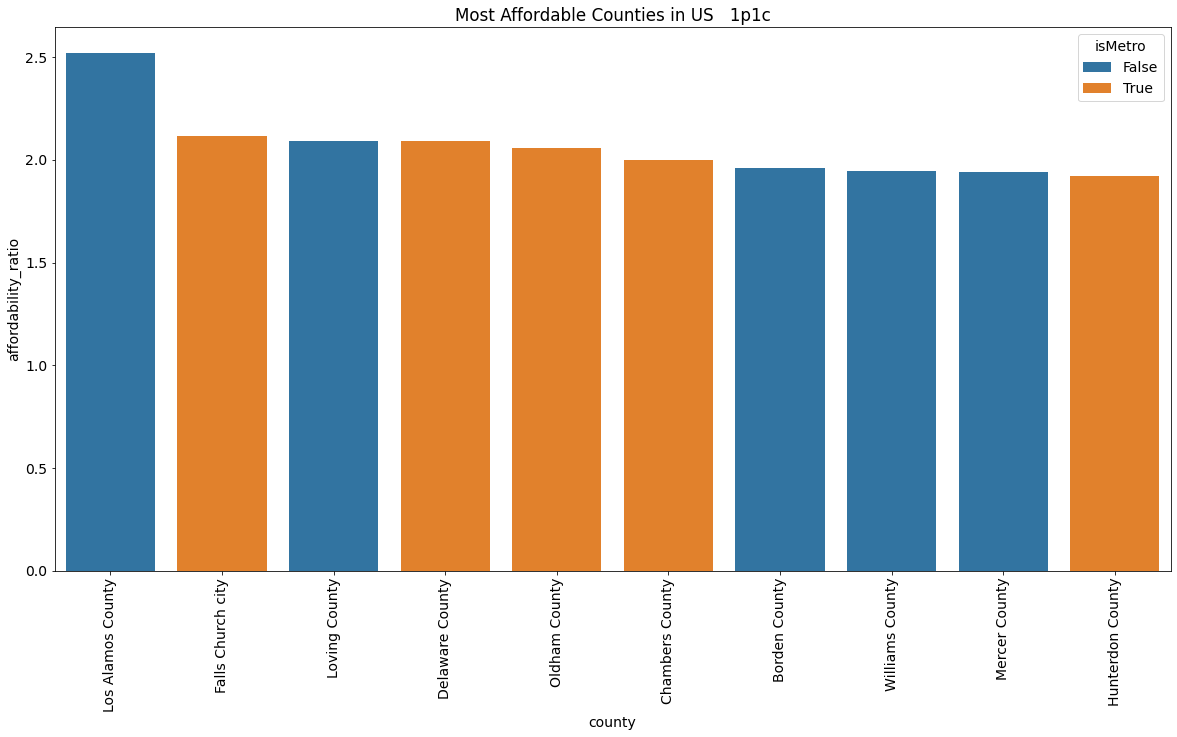

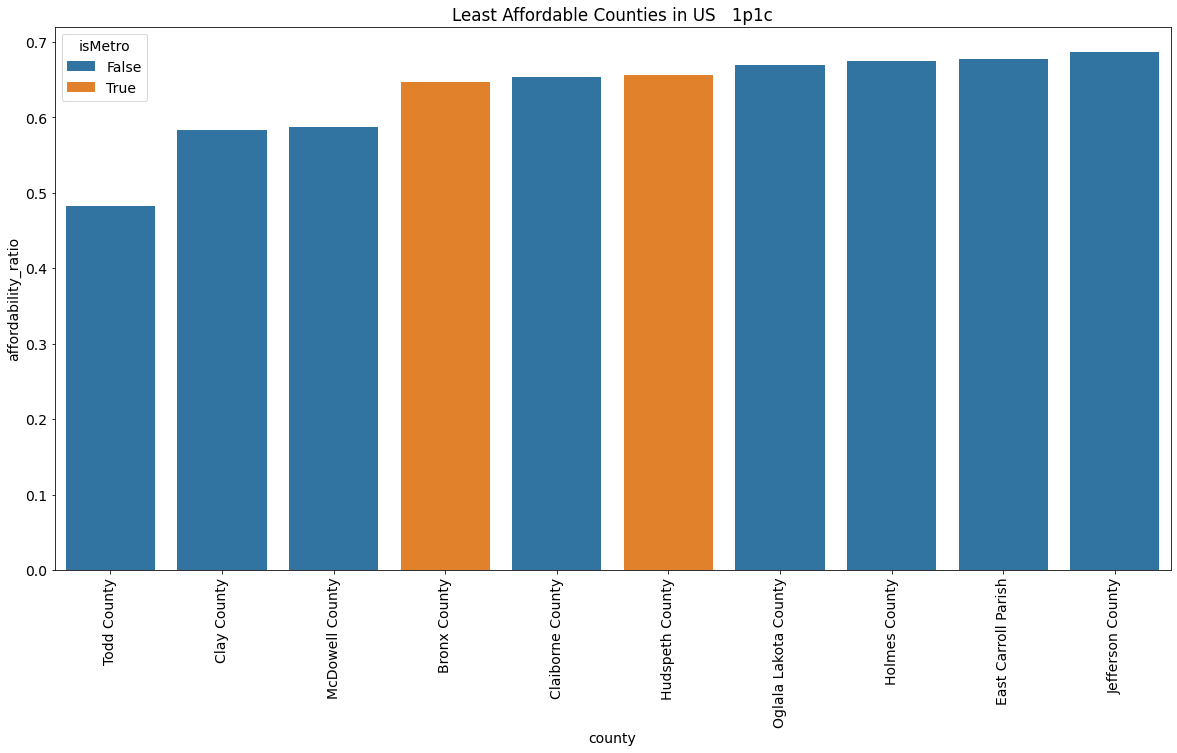

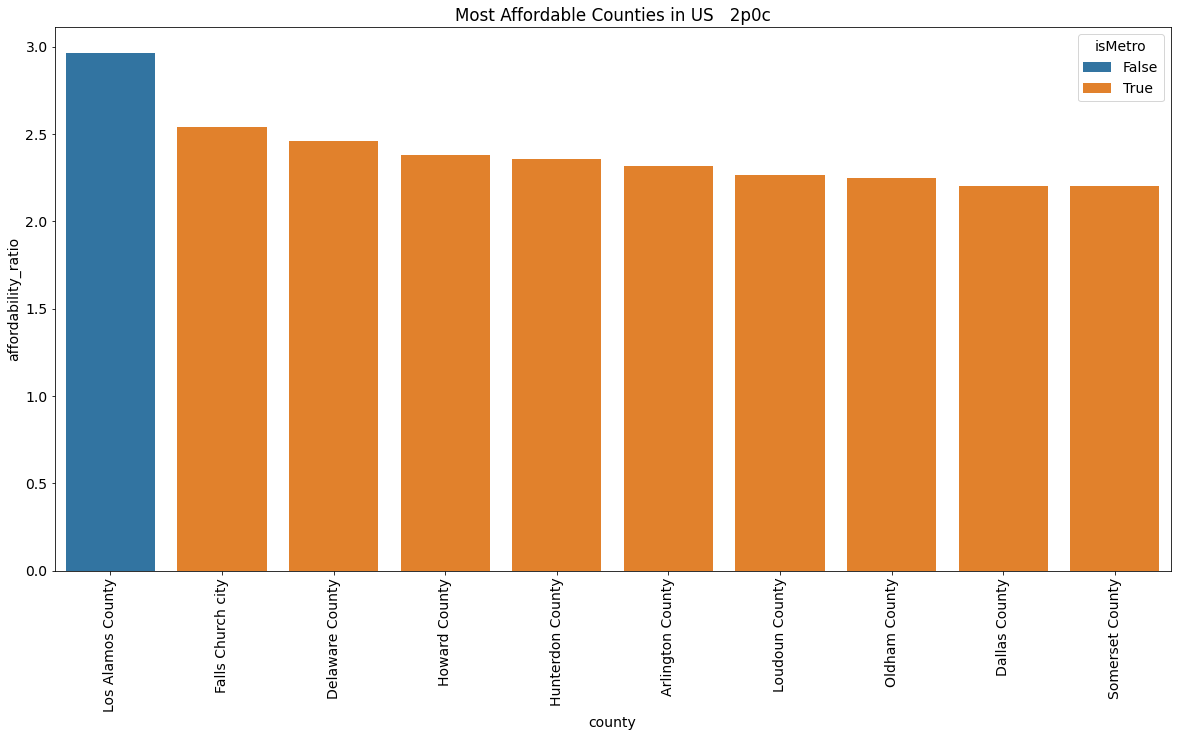

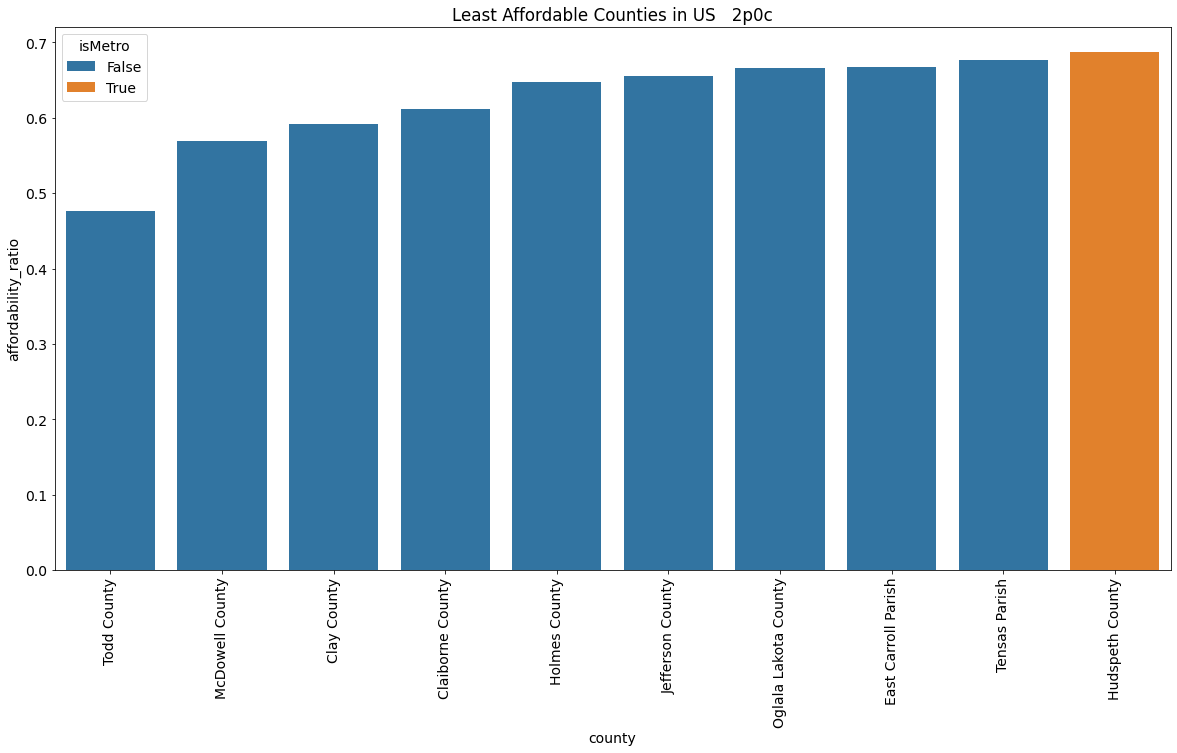

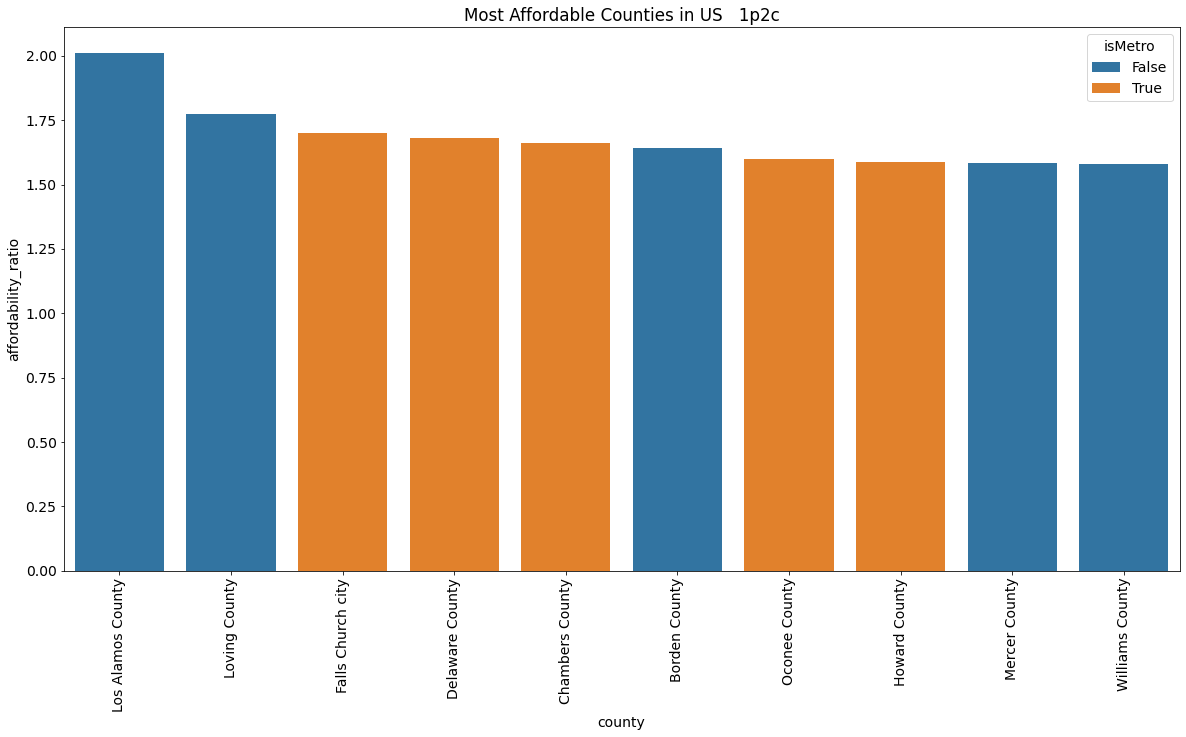

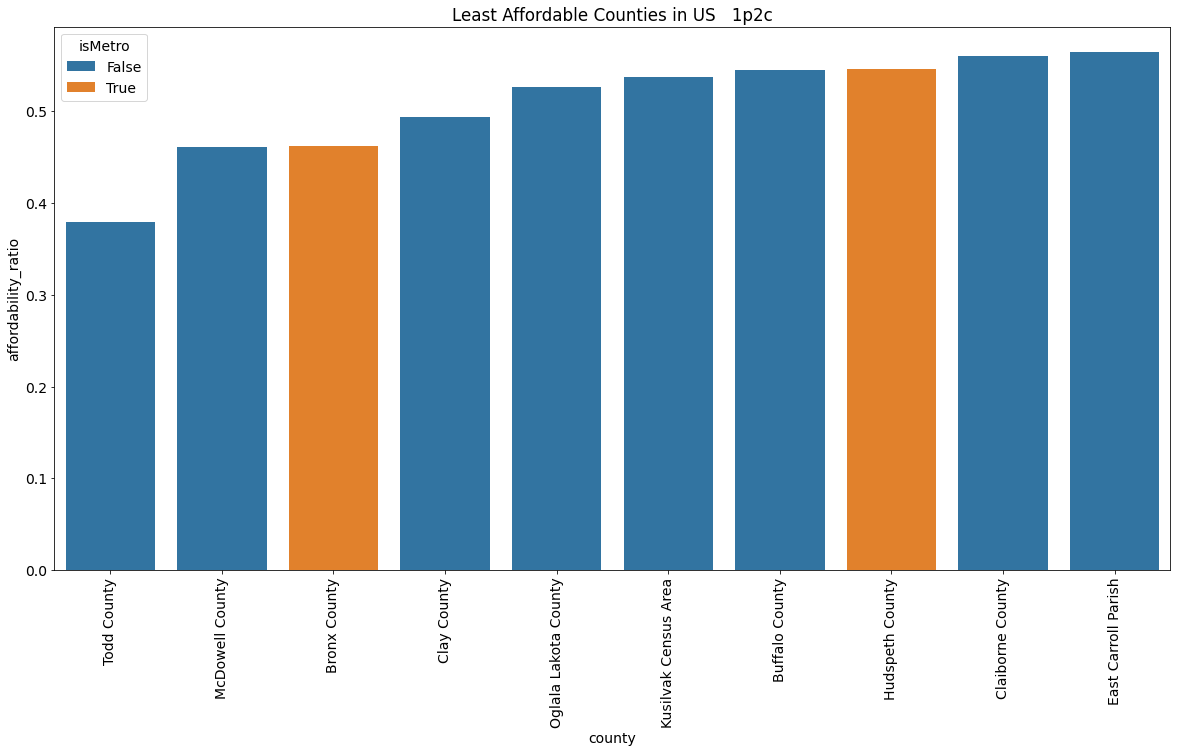

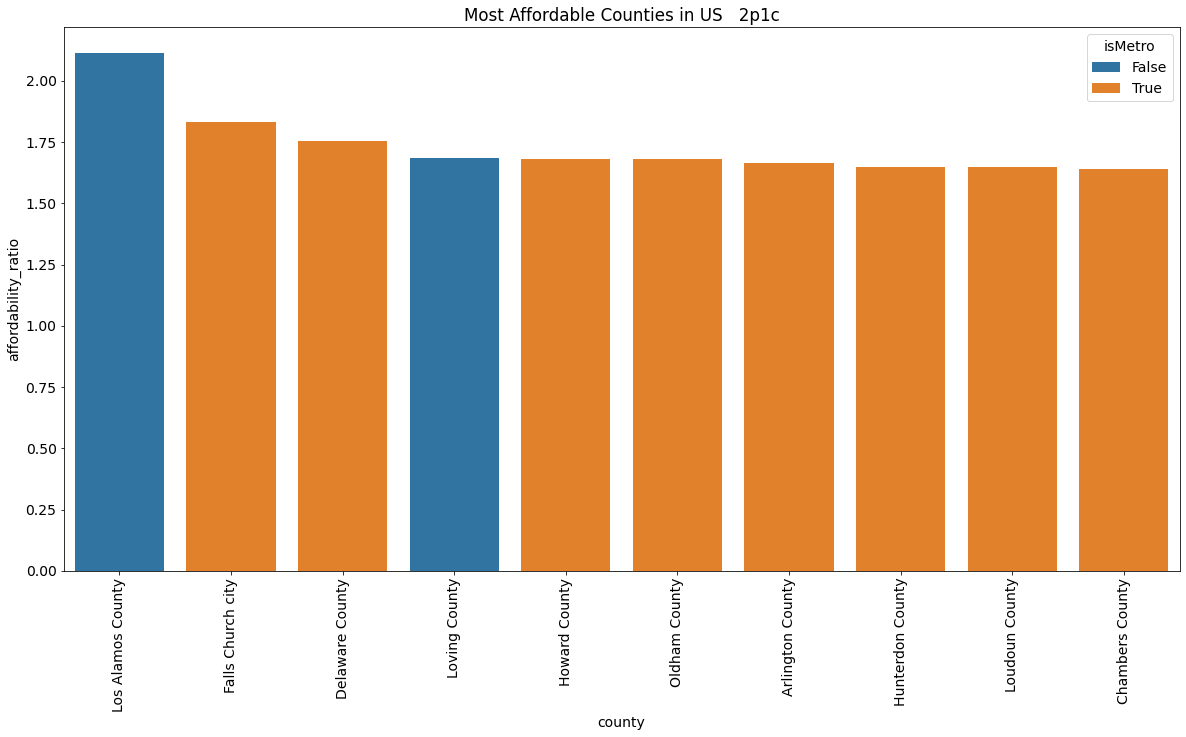

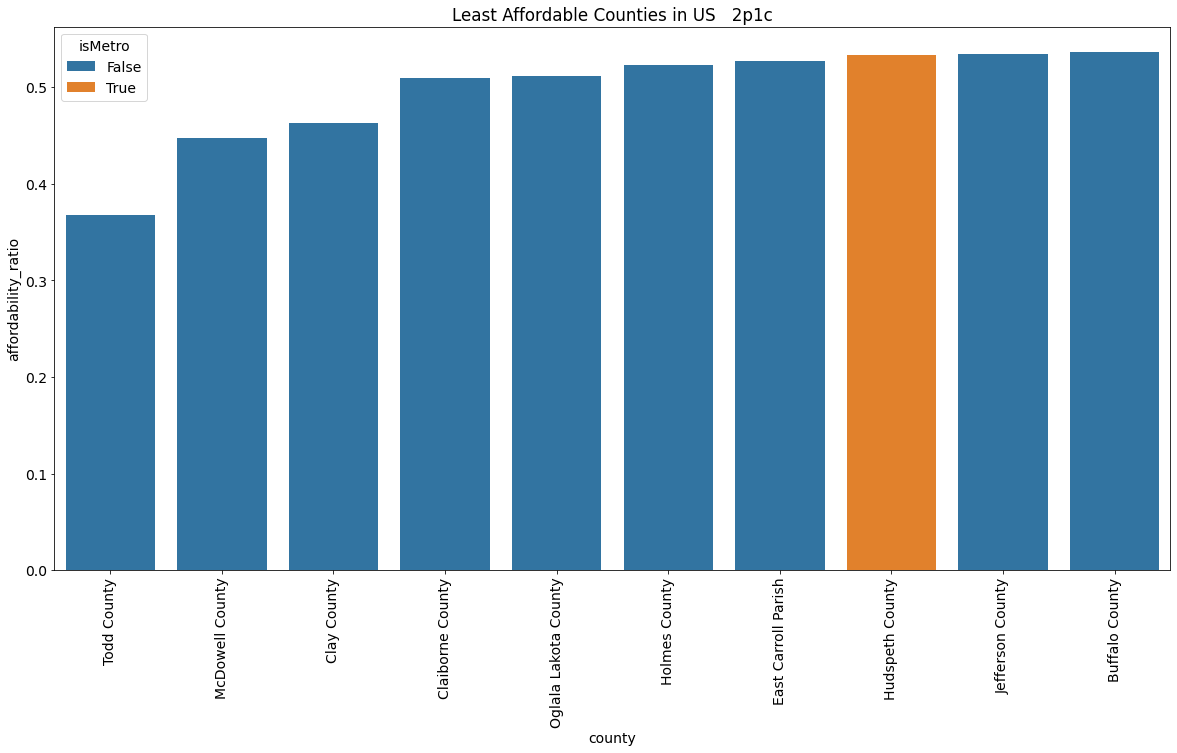

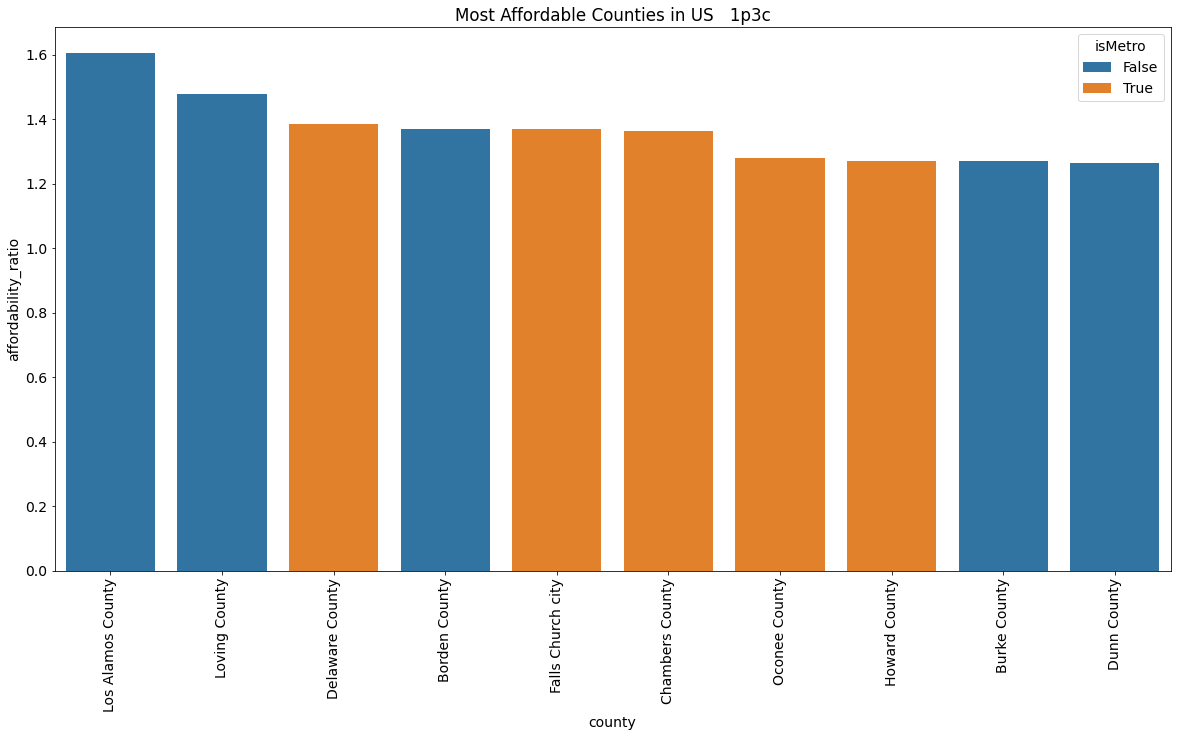

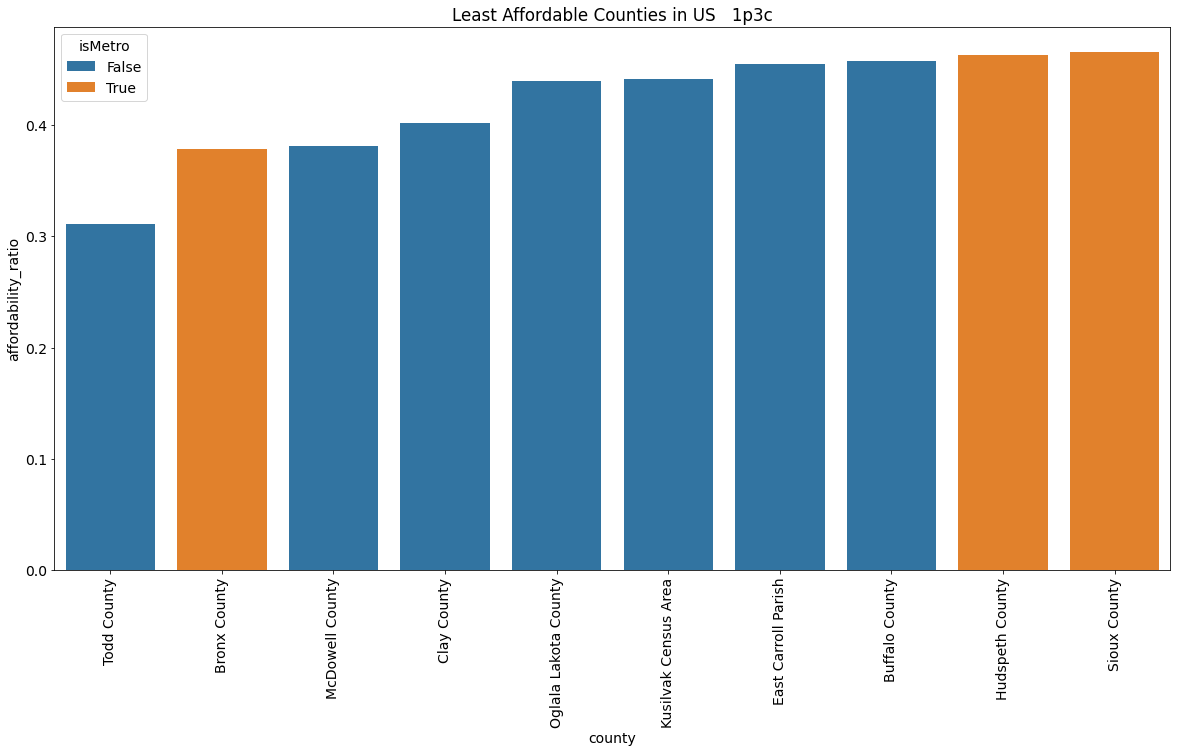

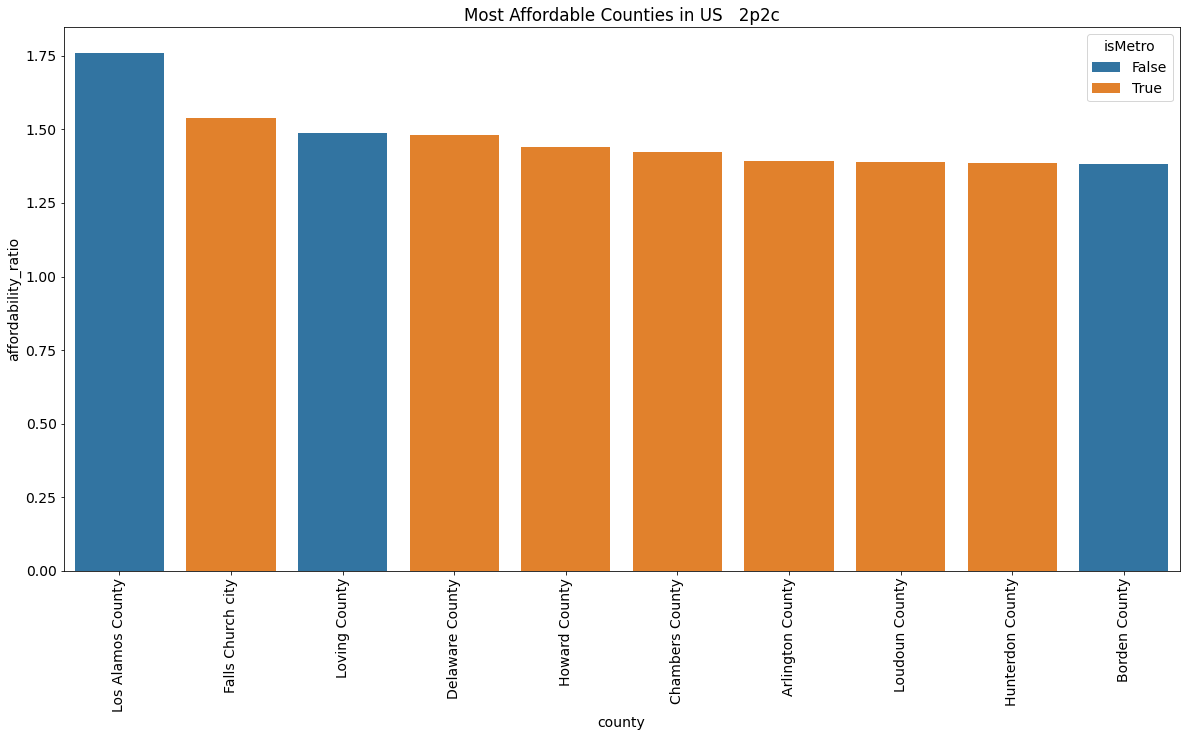

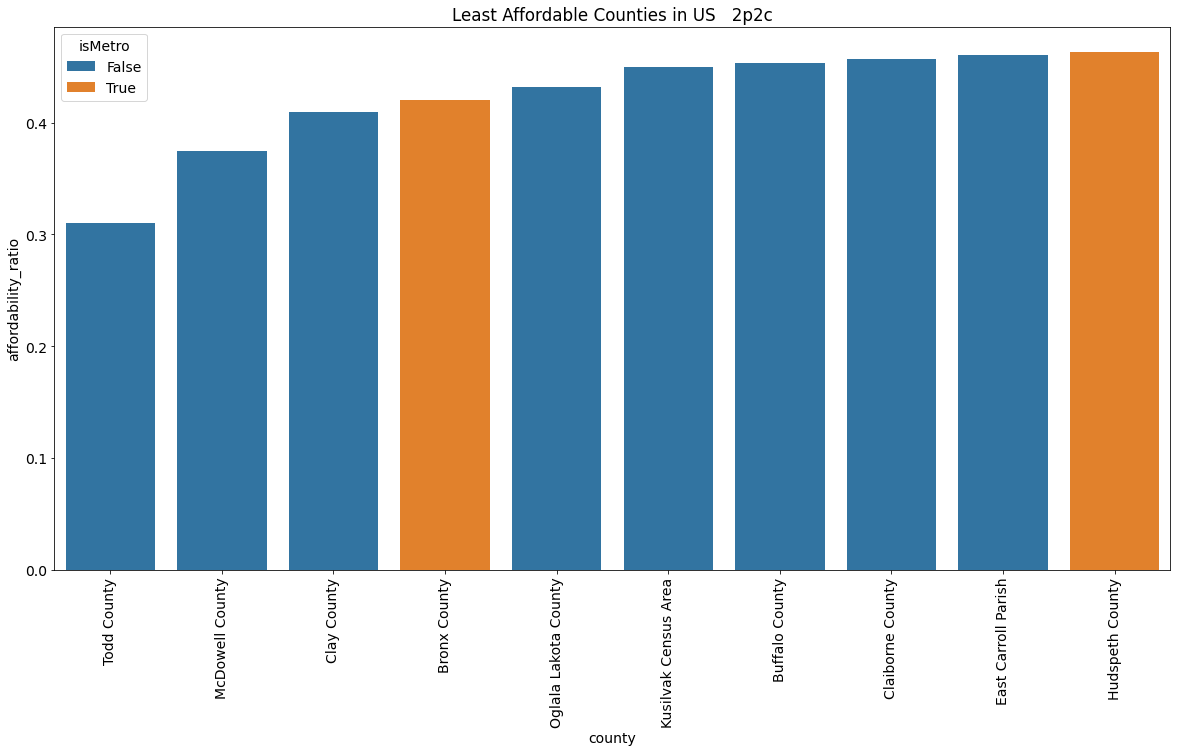

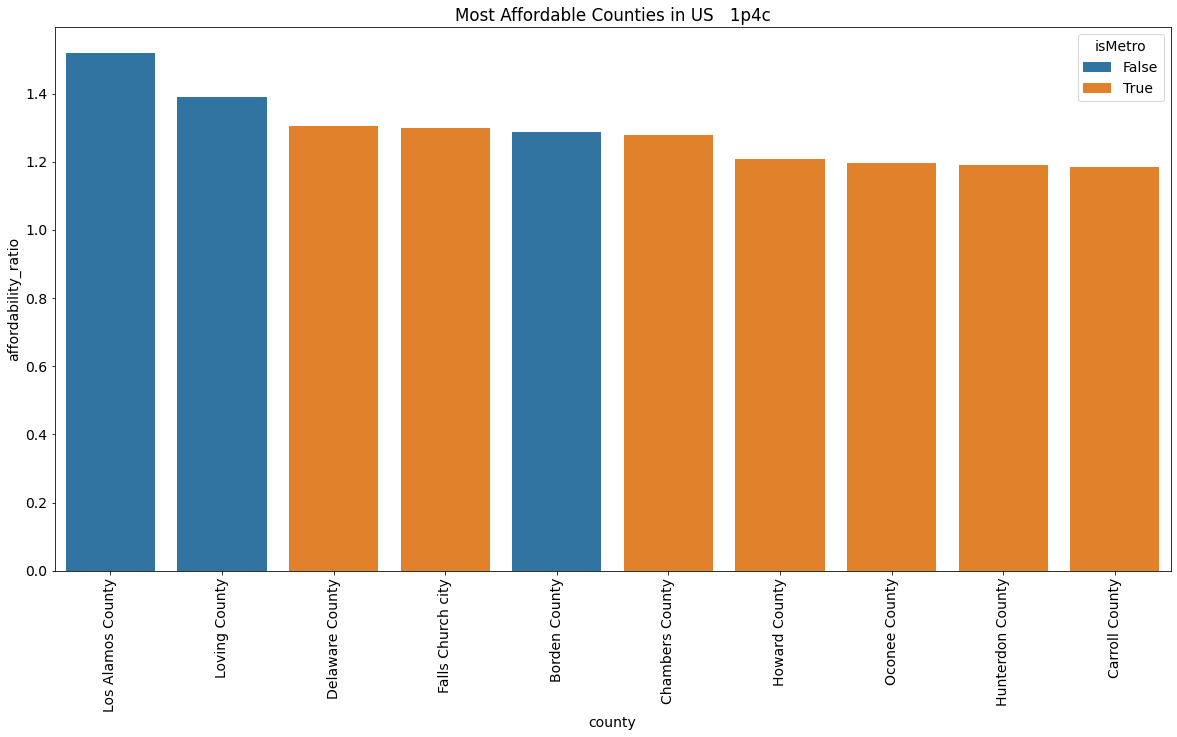

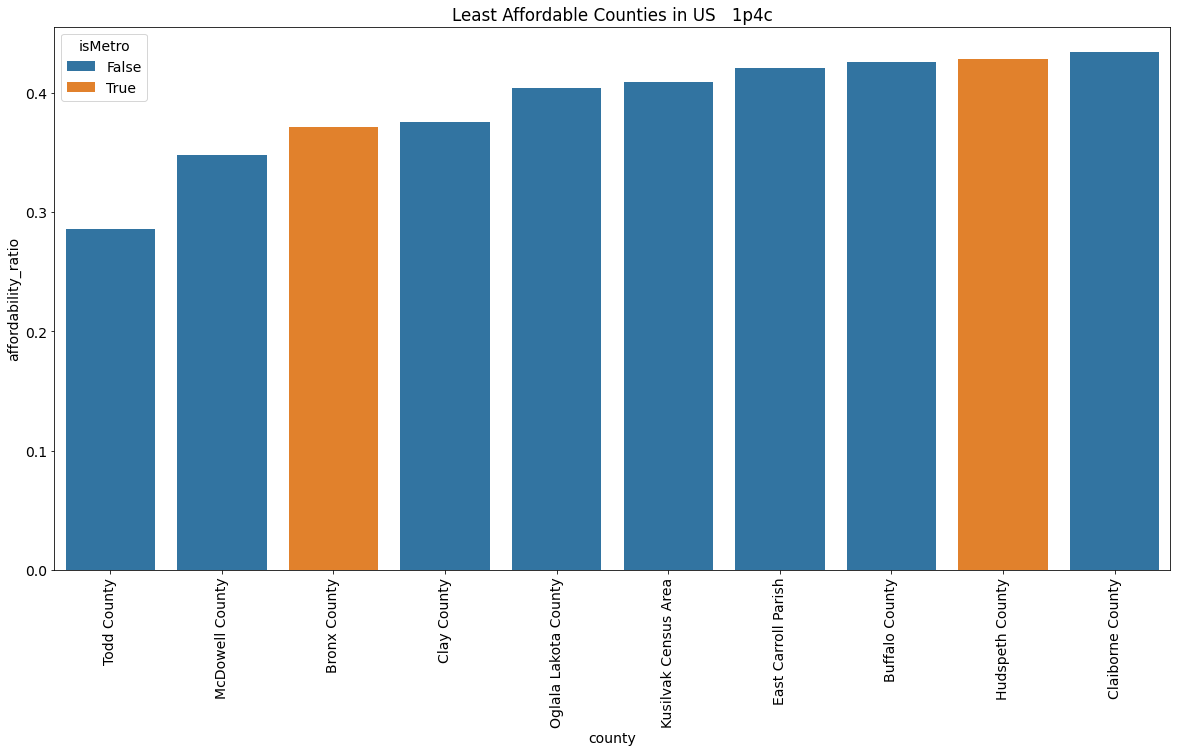

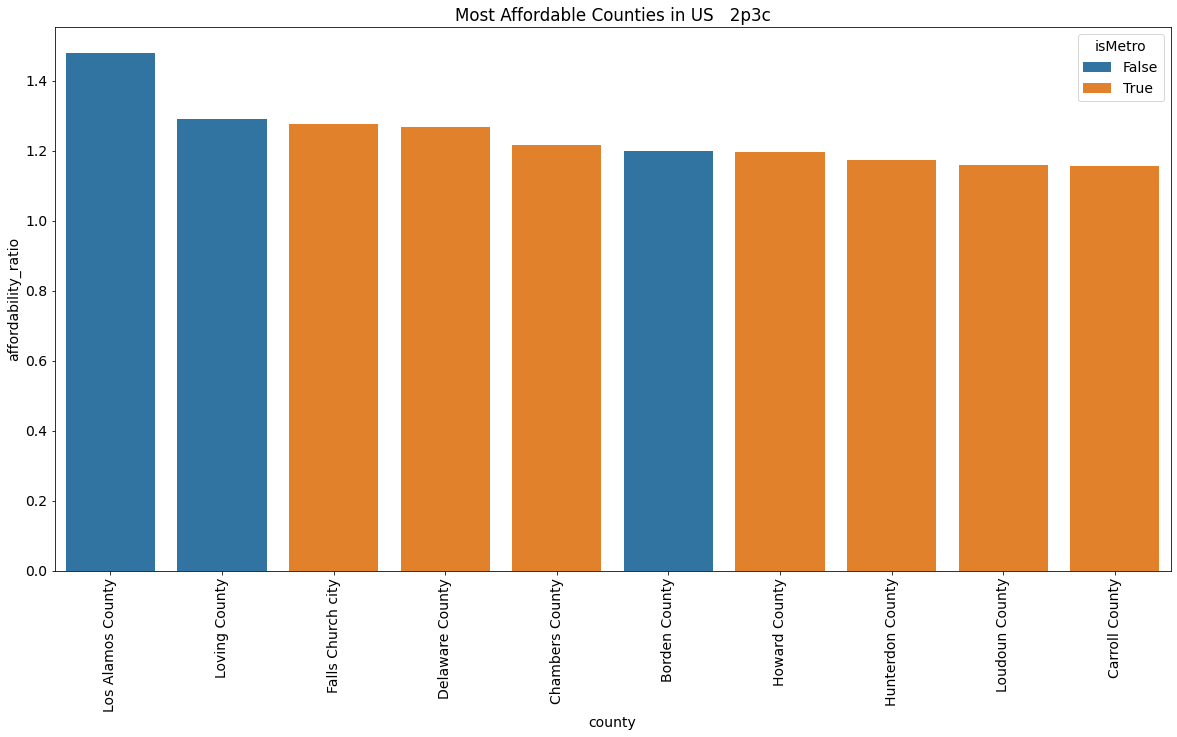

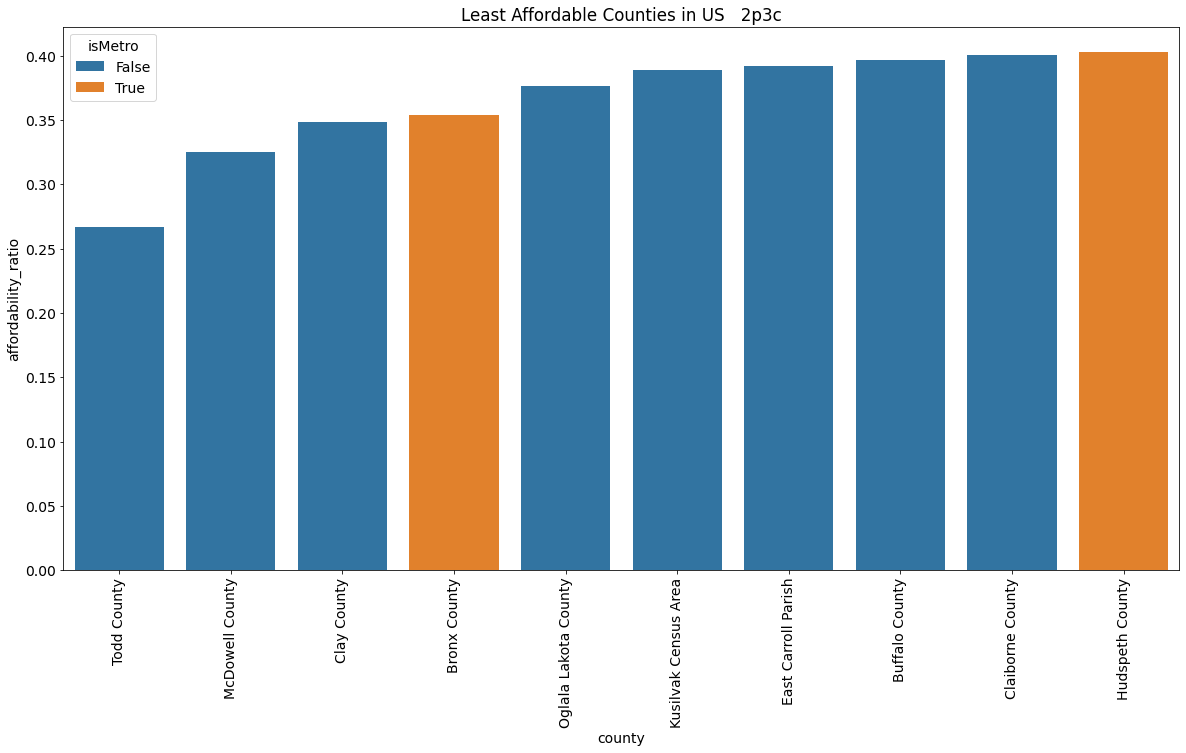

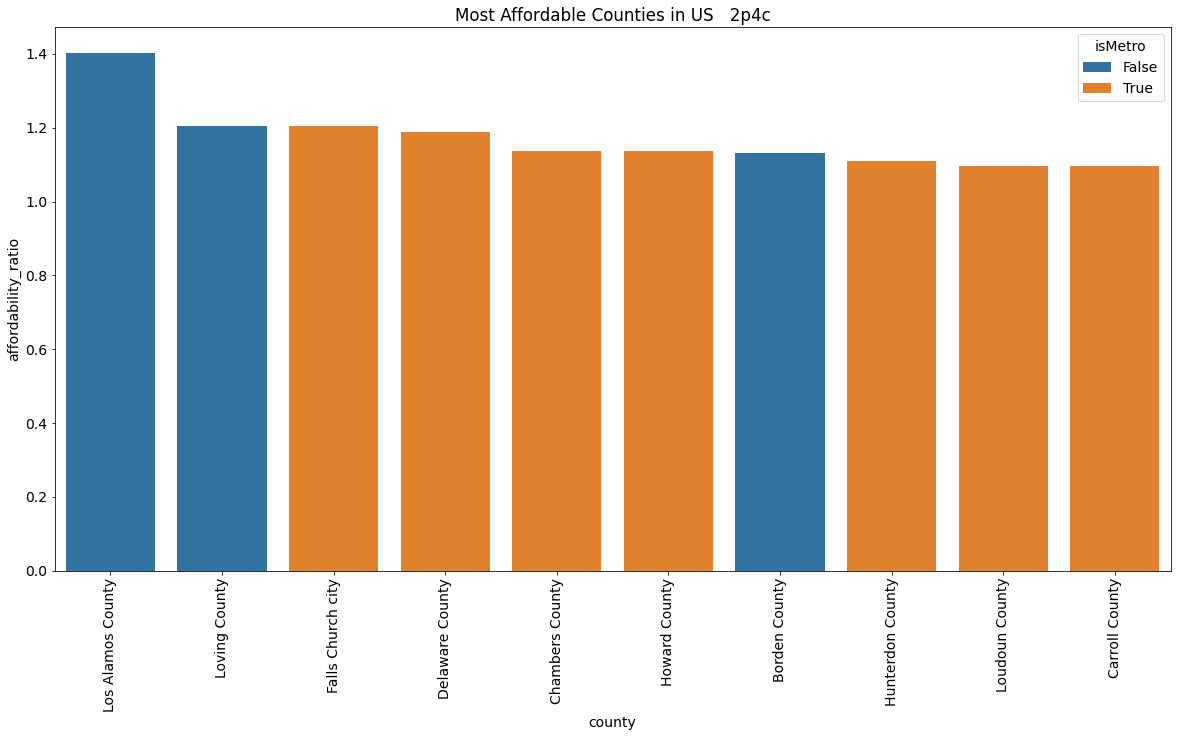

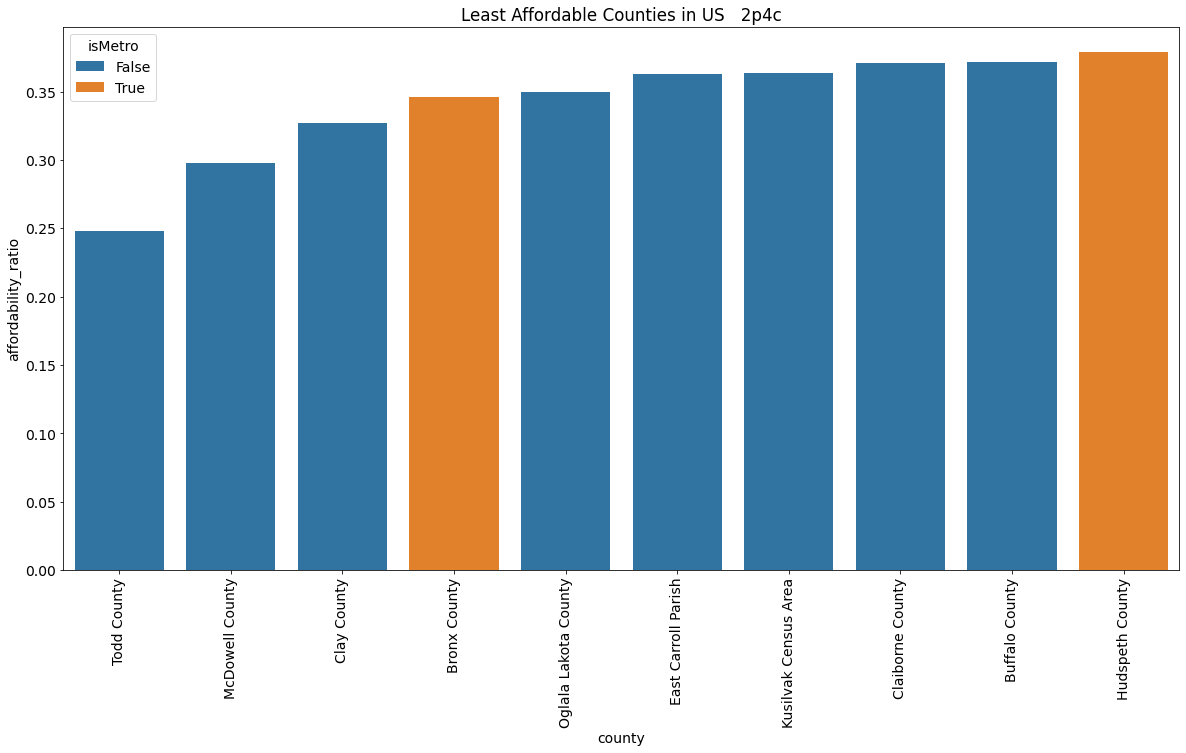

In [153]:
for fs in family_size:
    ds_df = modified_df[modified_df["family_member_count"] == fs]
    most_affordable = ds_df.nlargest(10, "affordability_ratio")
    least_affordable = ds_df.nsmallest(10, "affordability_ratio")
    affordability_graphs(most_affordable, "US", "Most", fs)
    affordability_graphs(least_affordable, "US", "Least", fs)

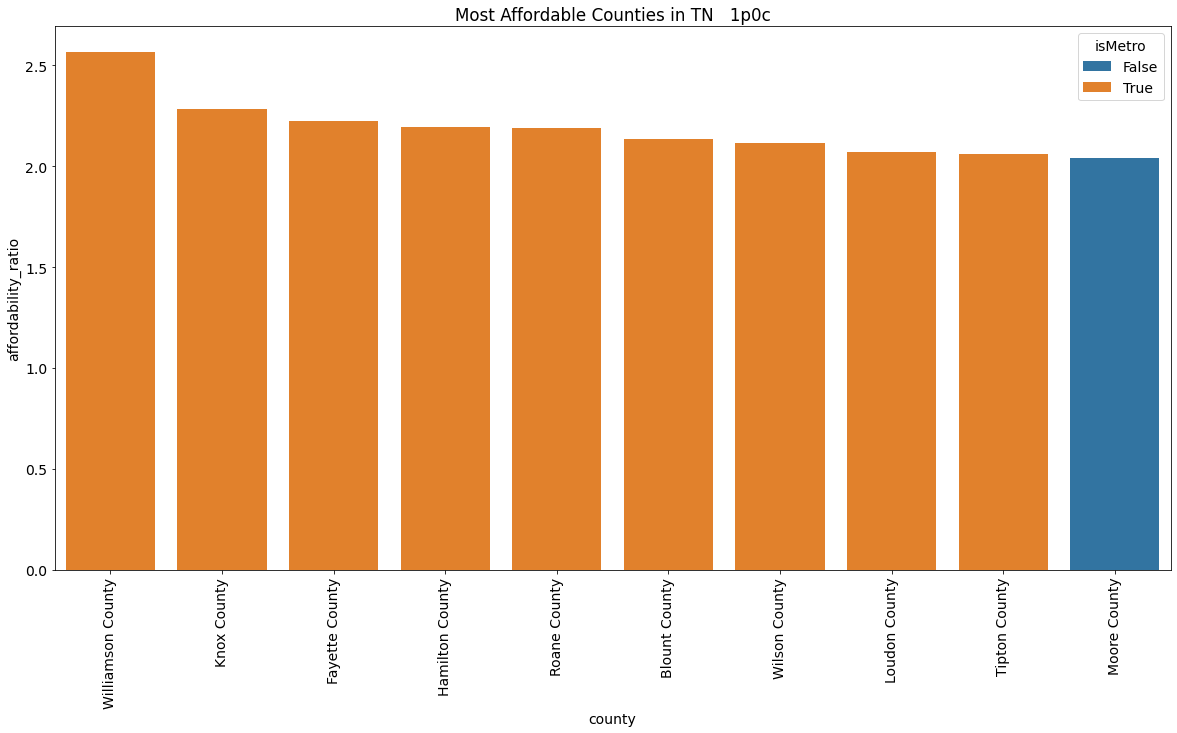

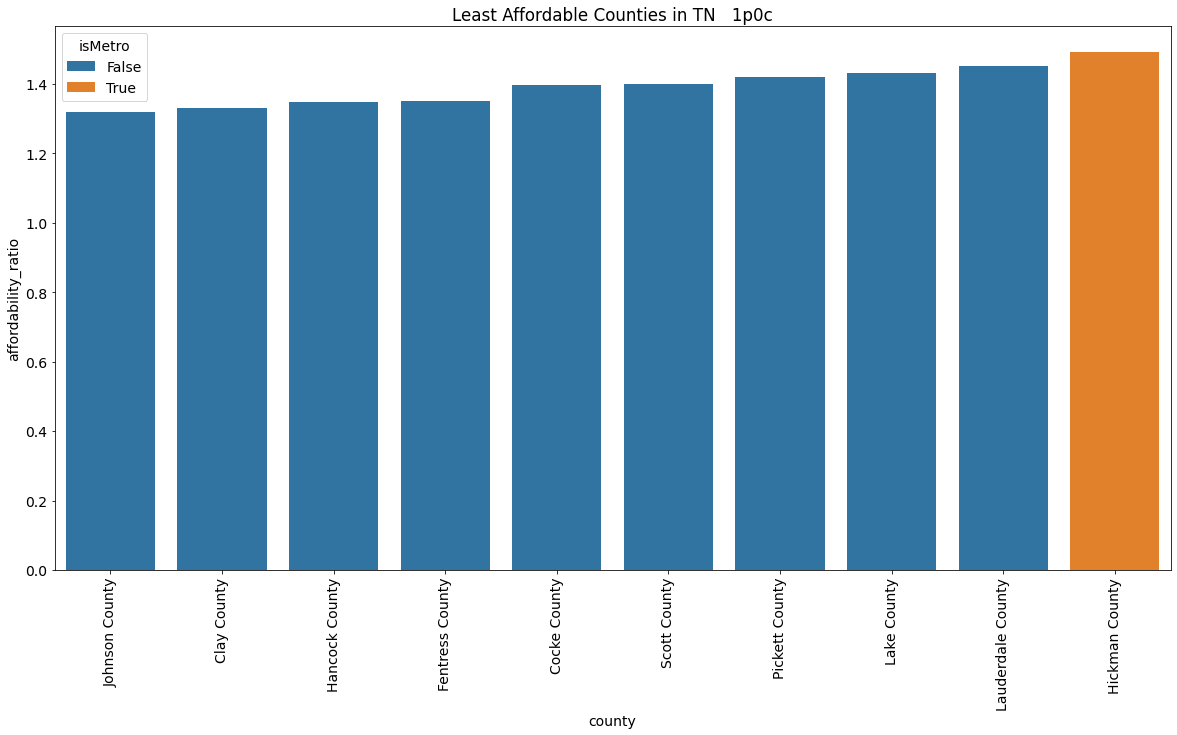

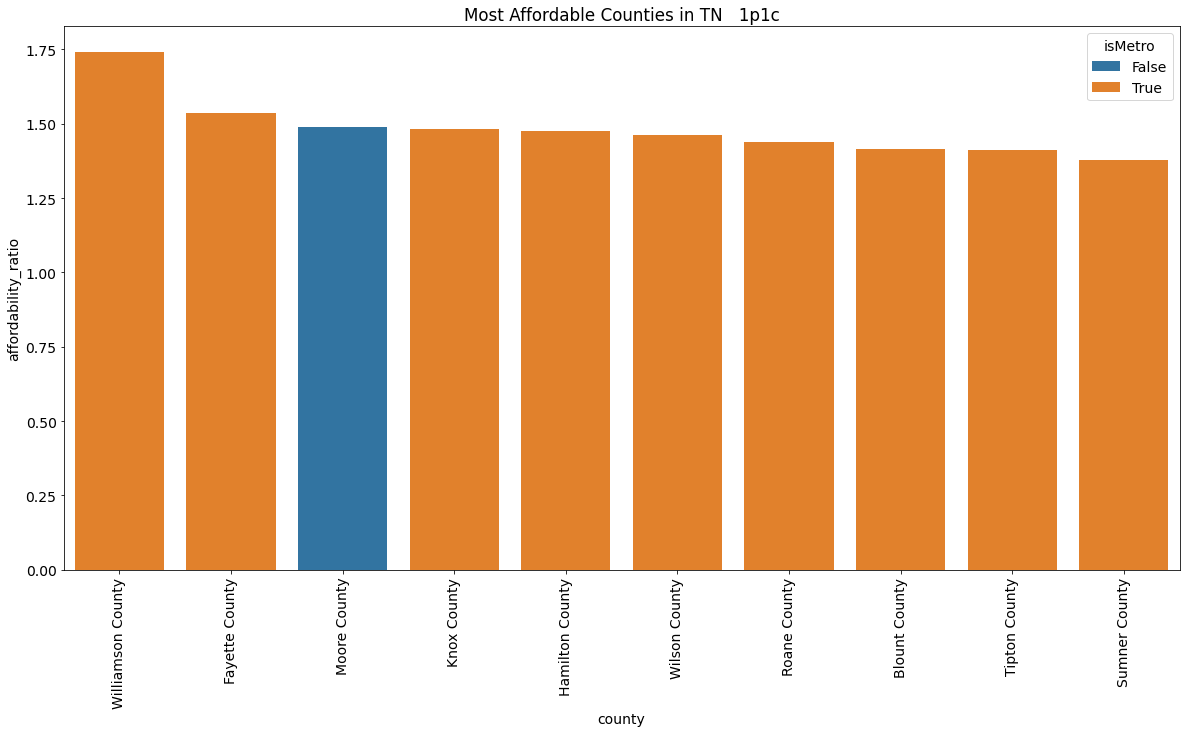

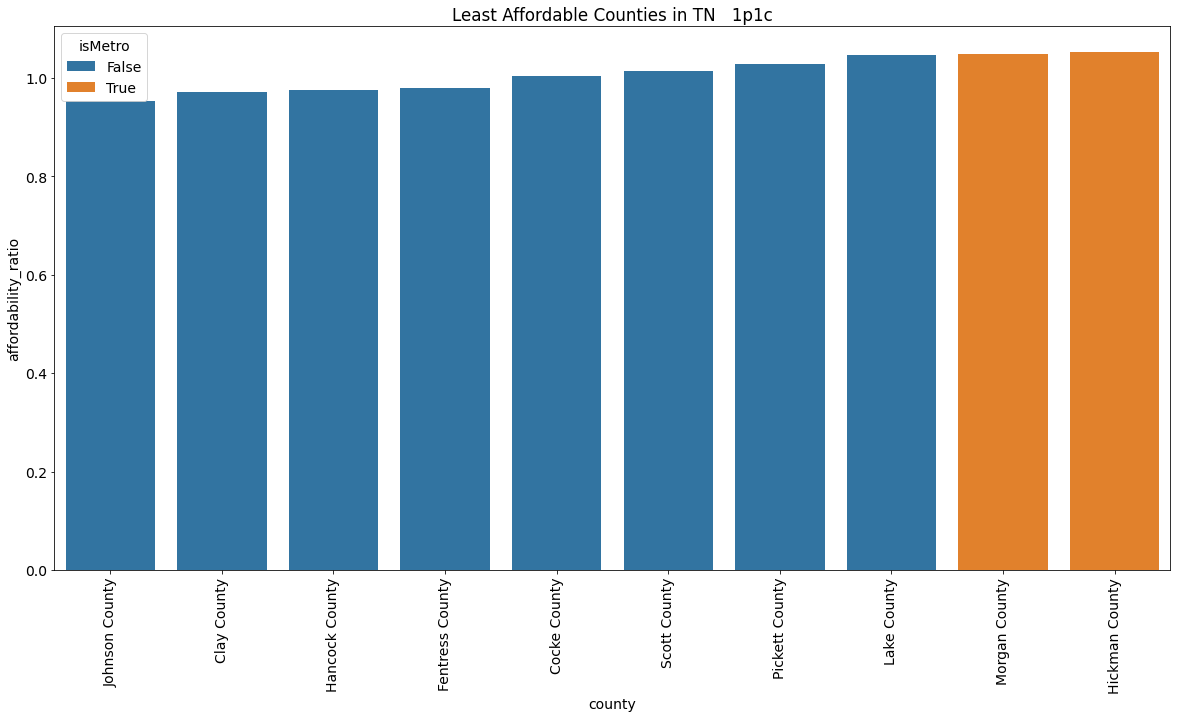

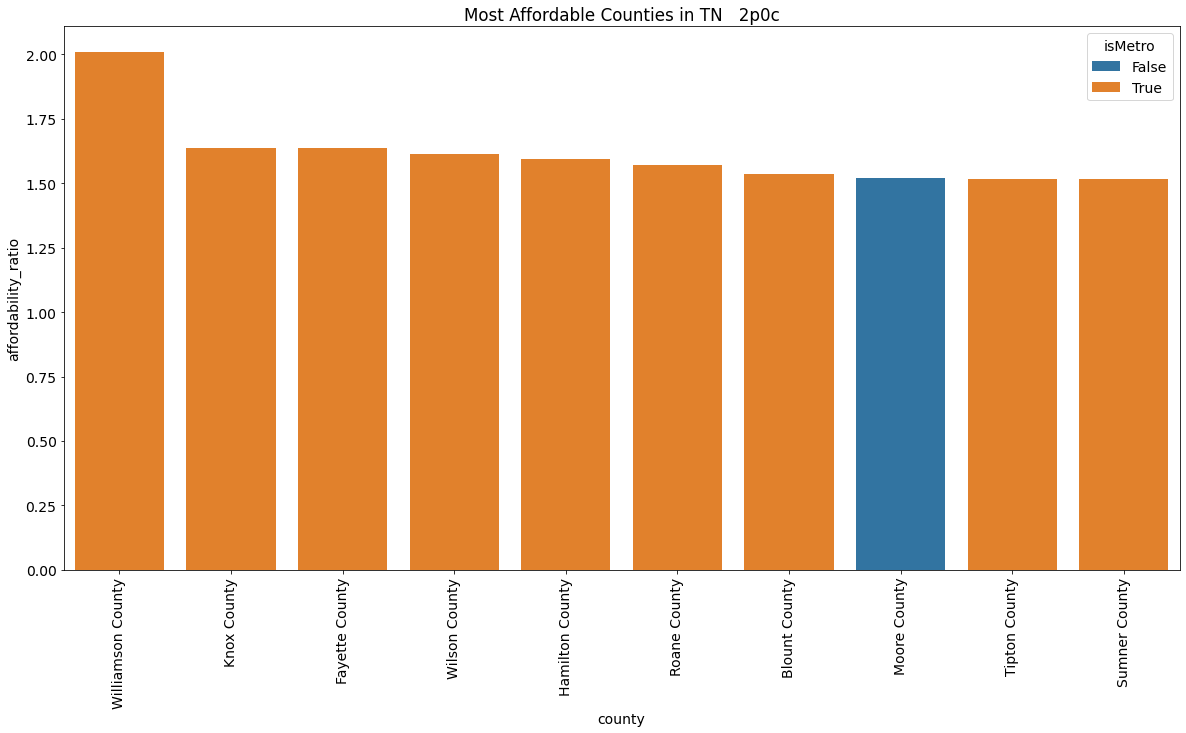

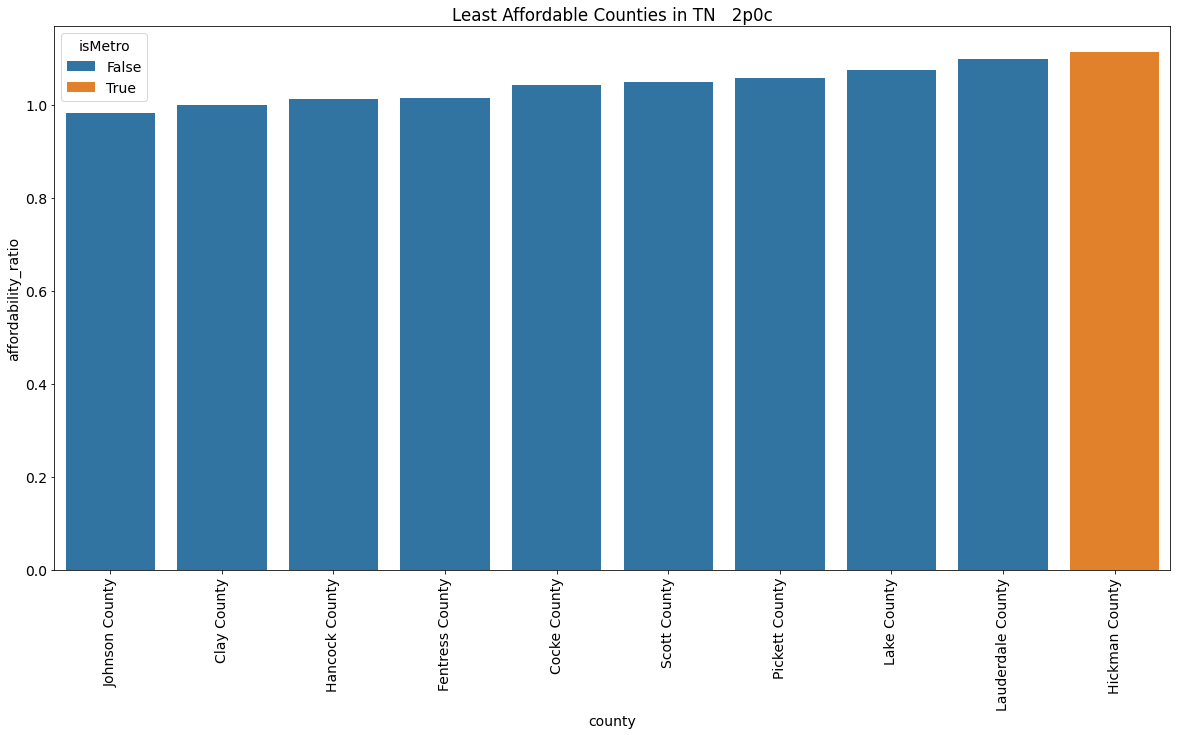

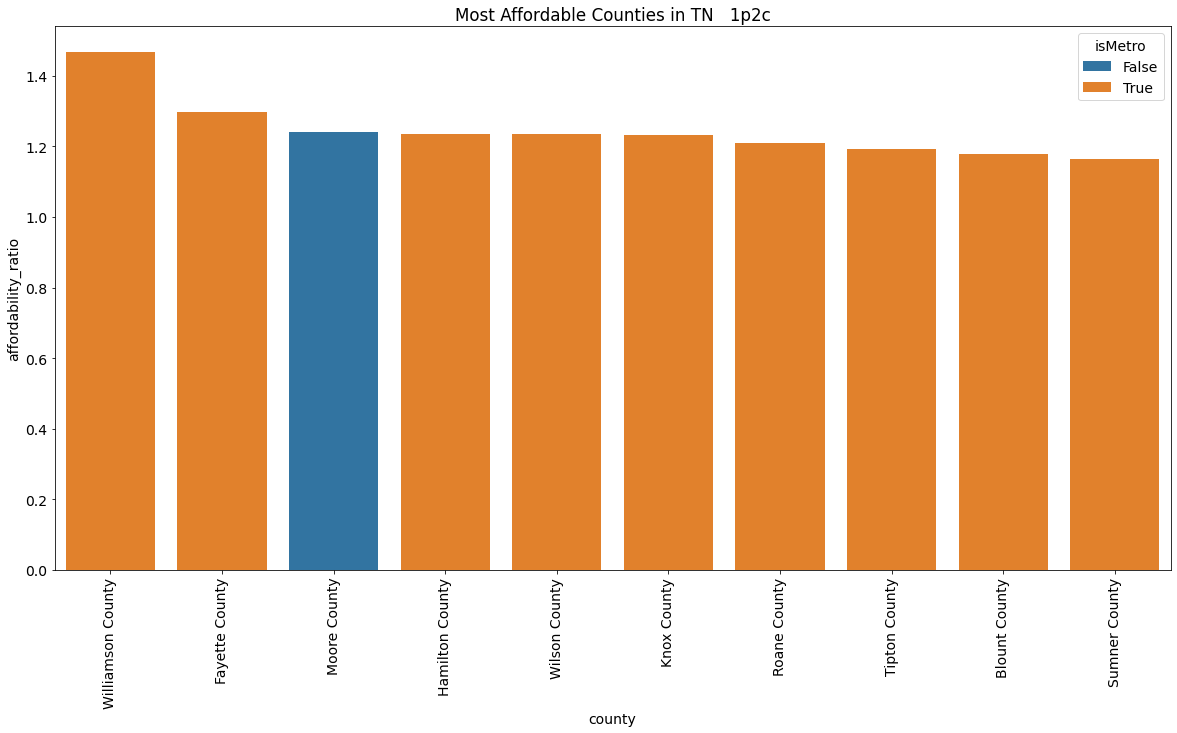

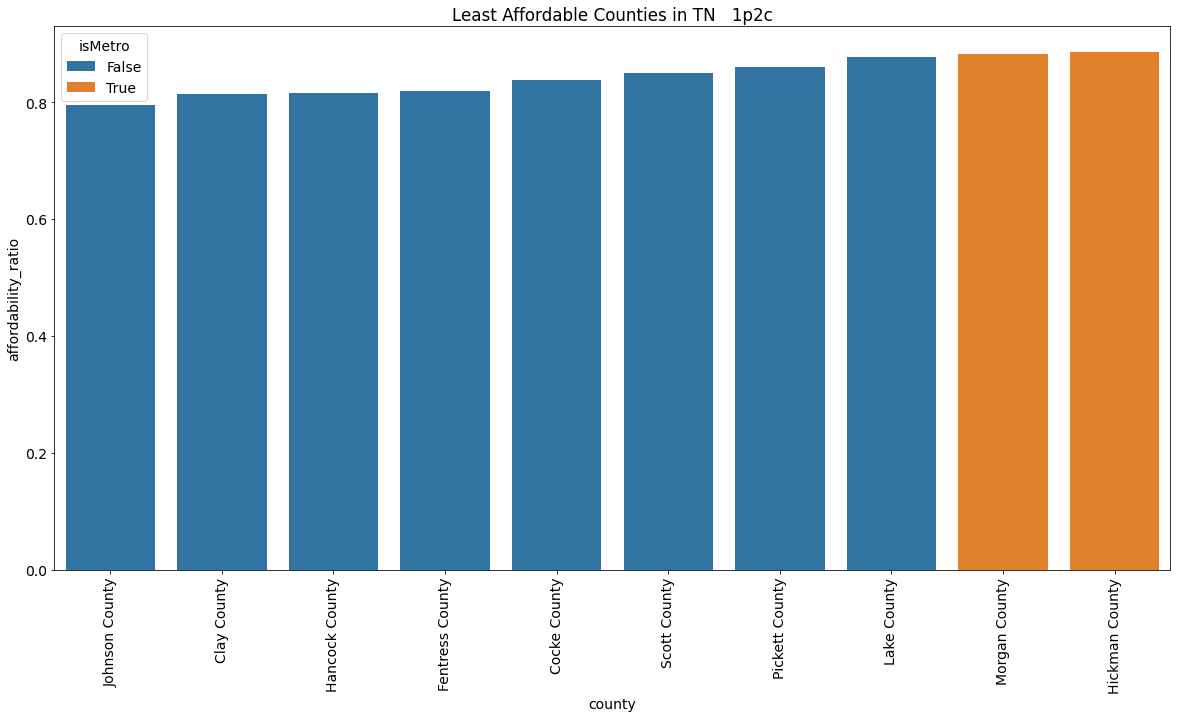

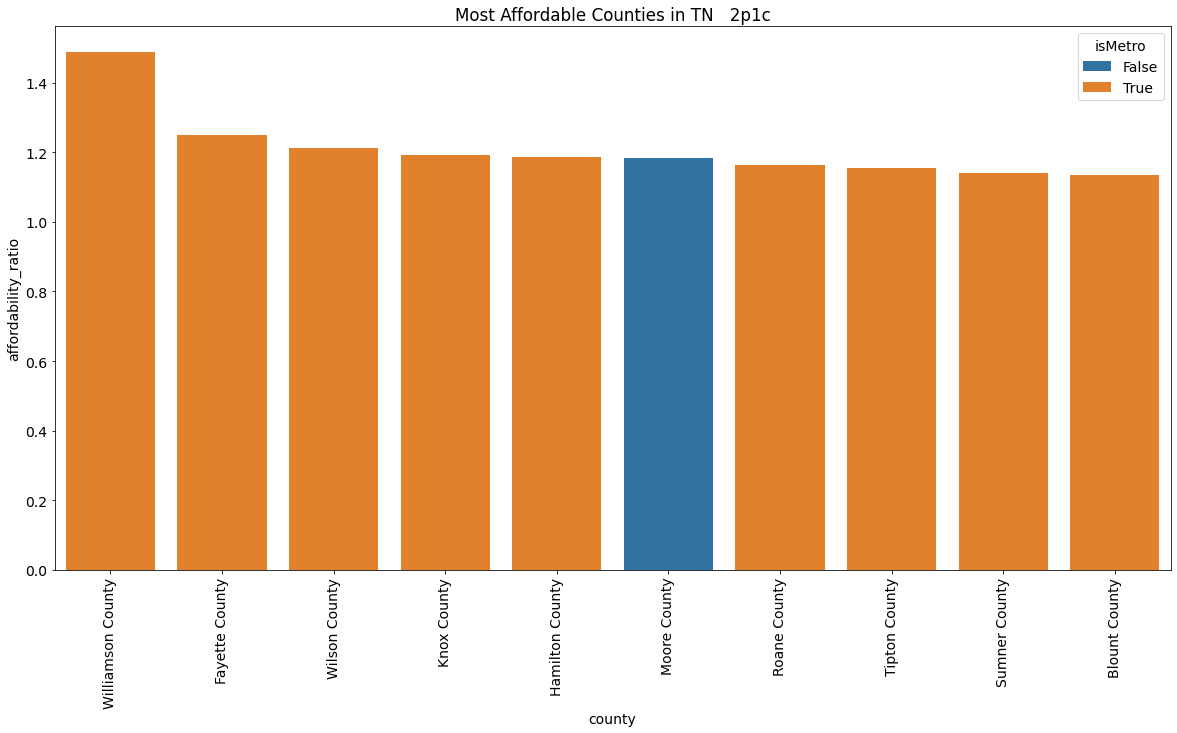

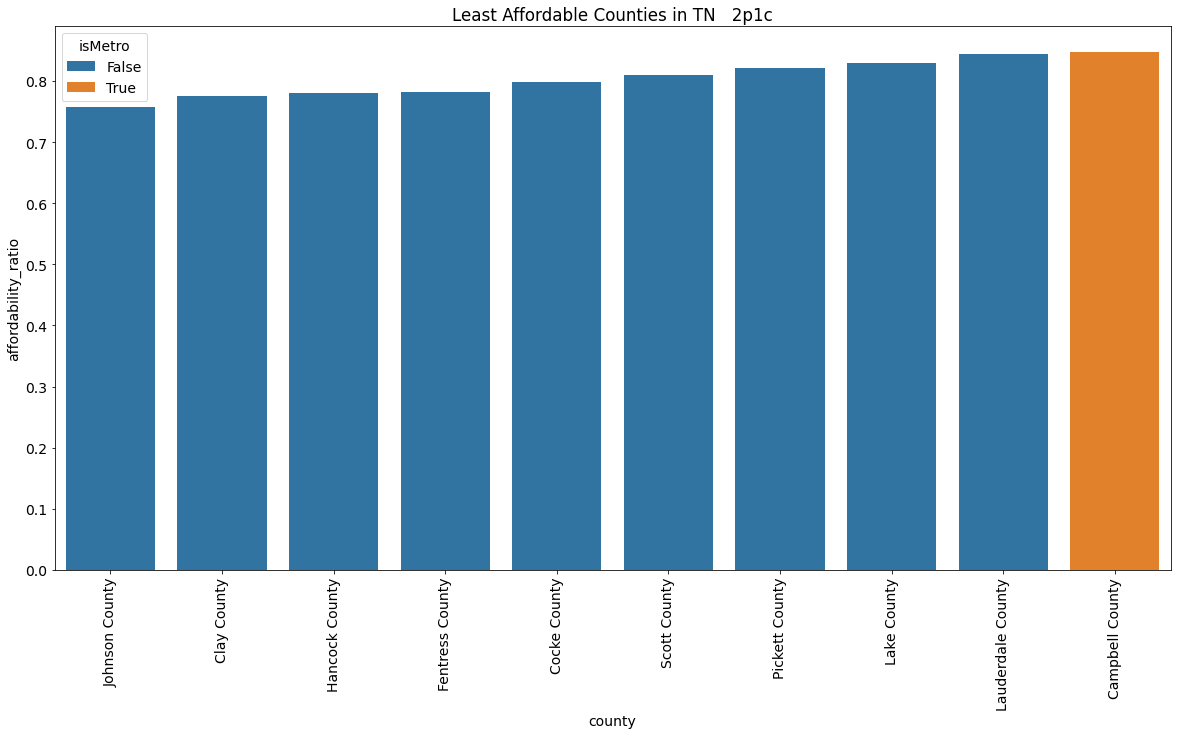

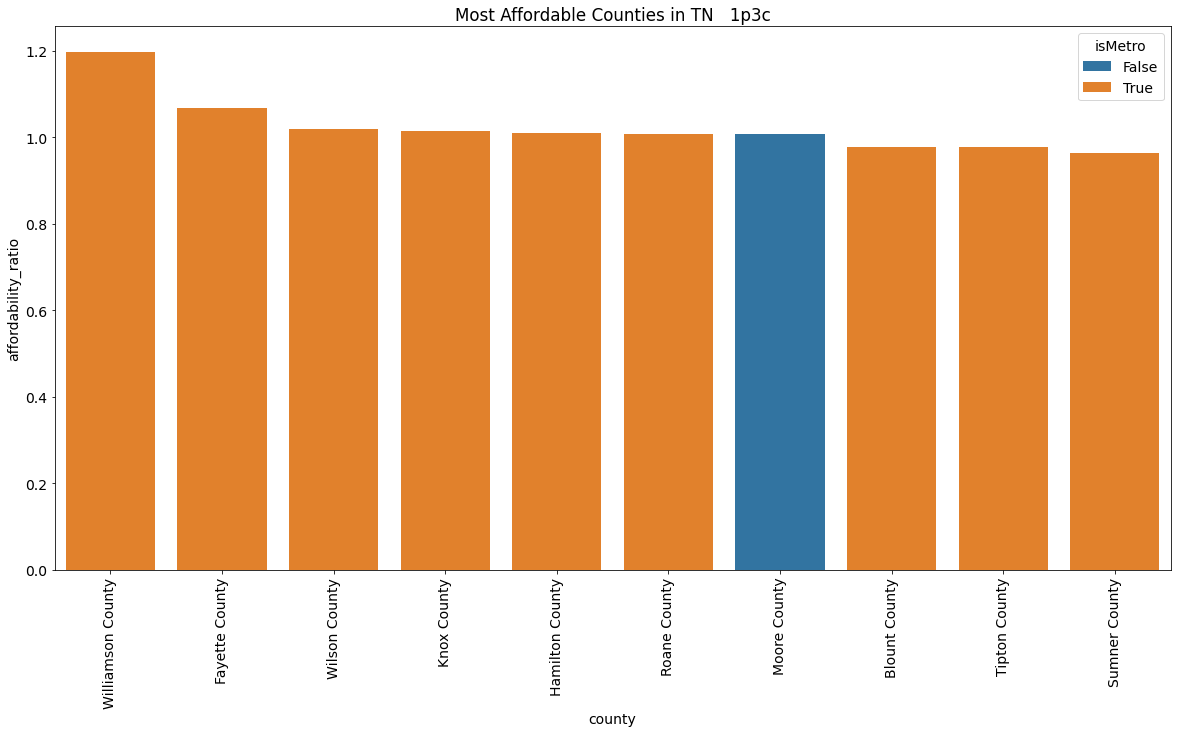

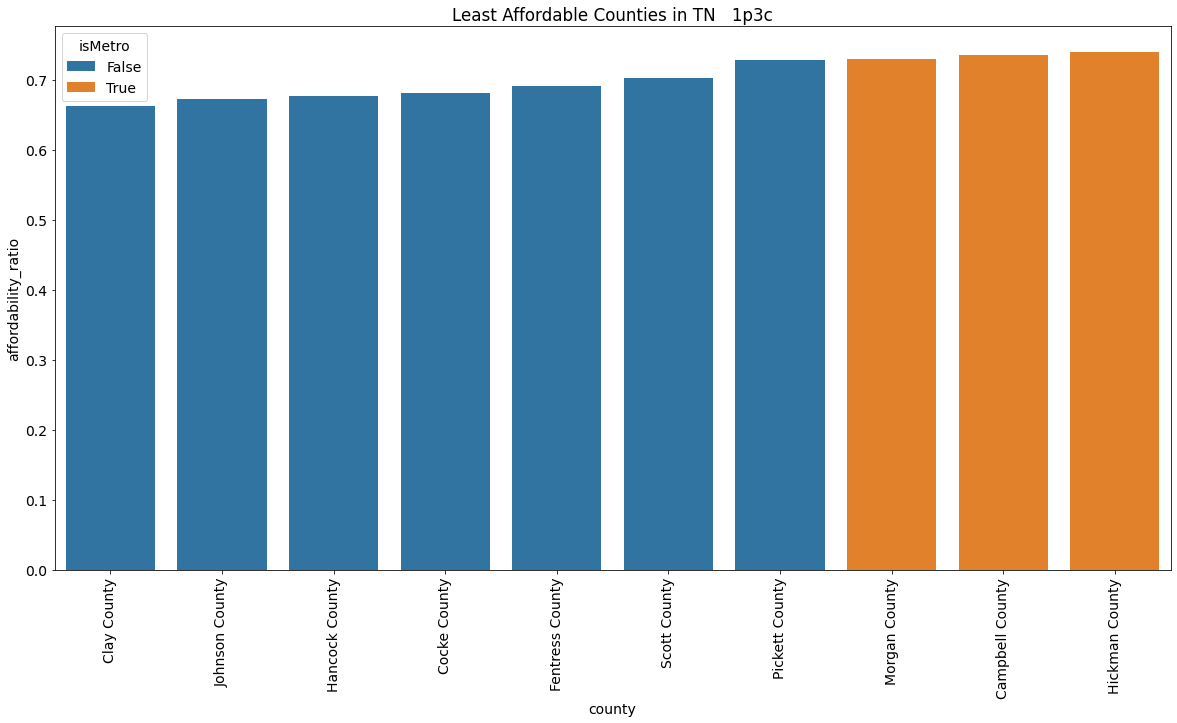

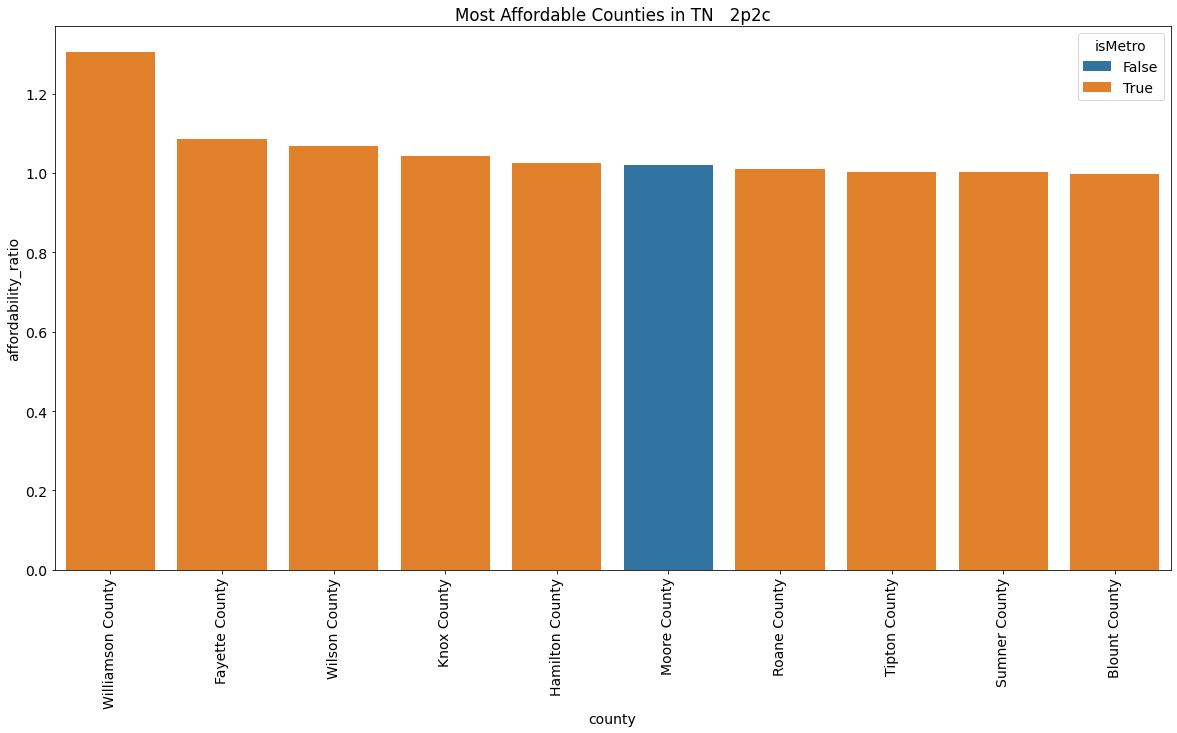

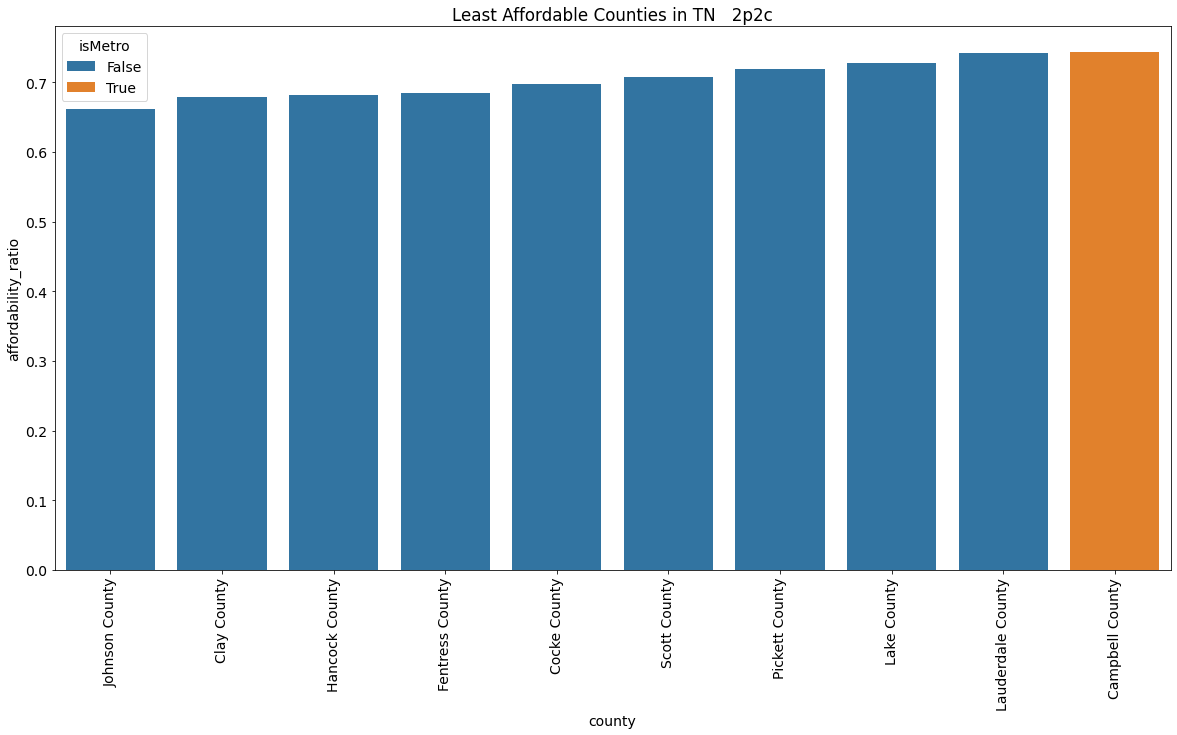

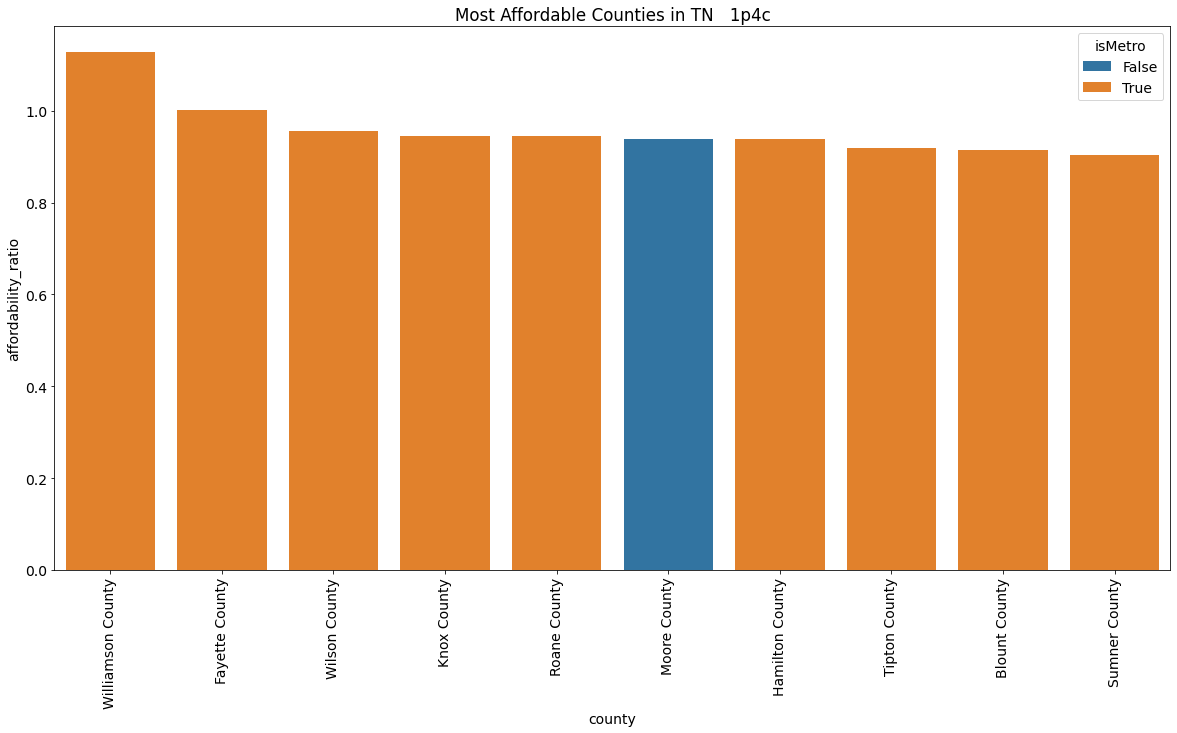

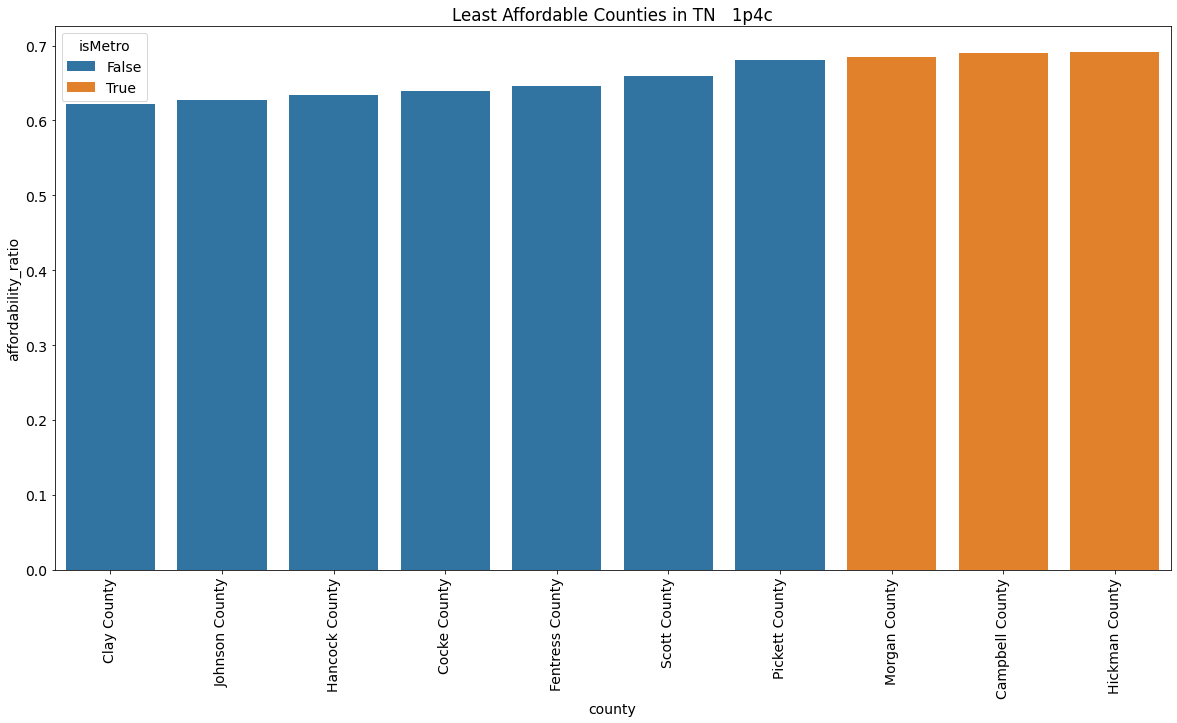

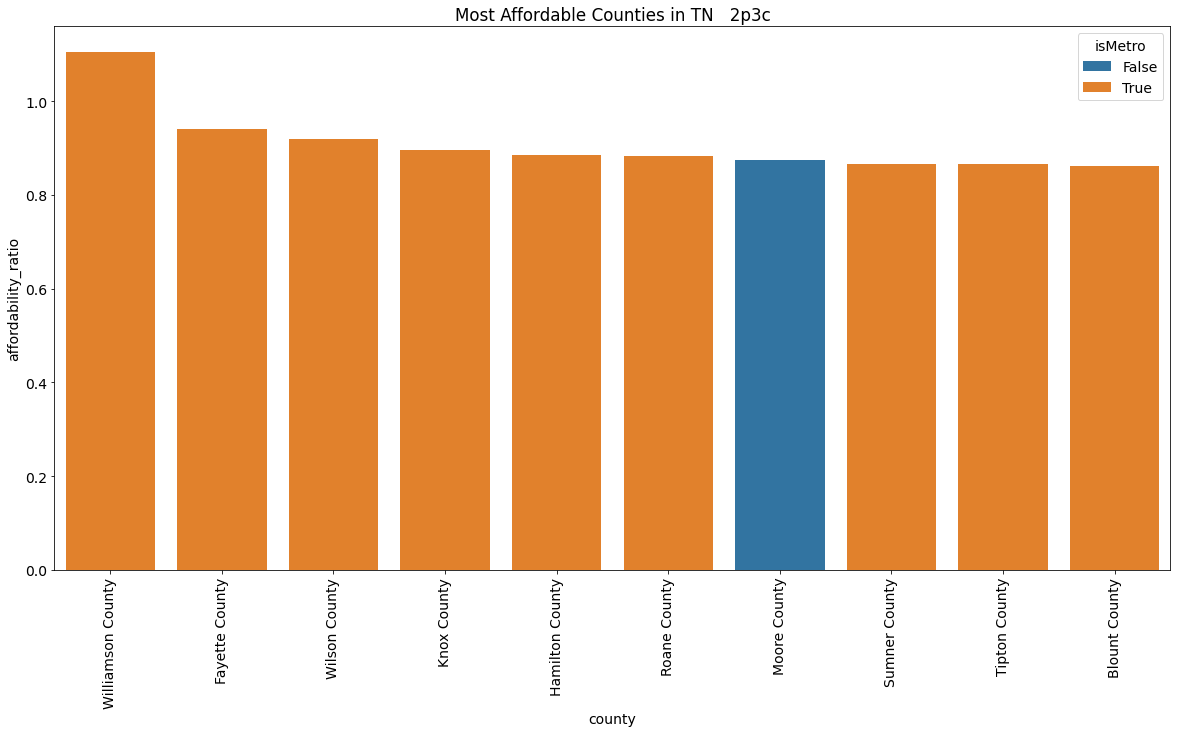

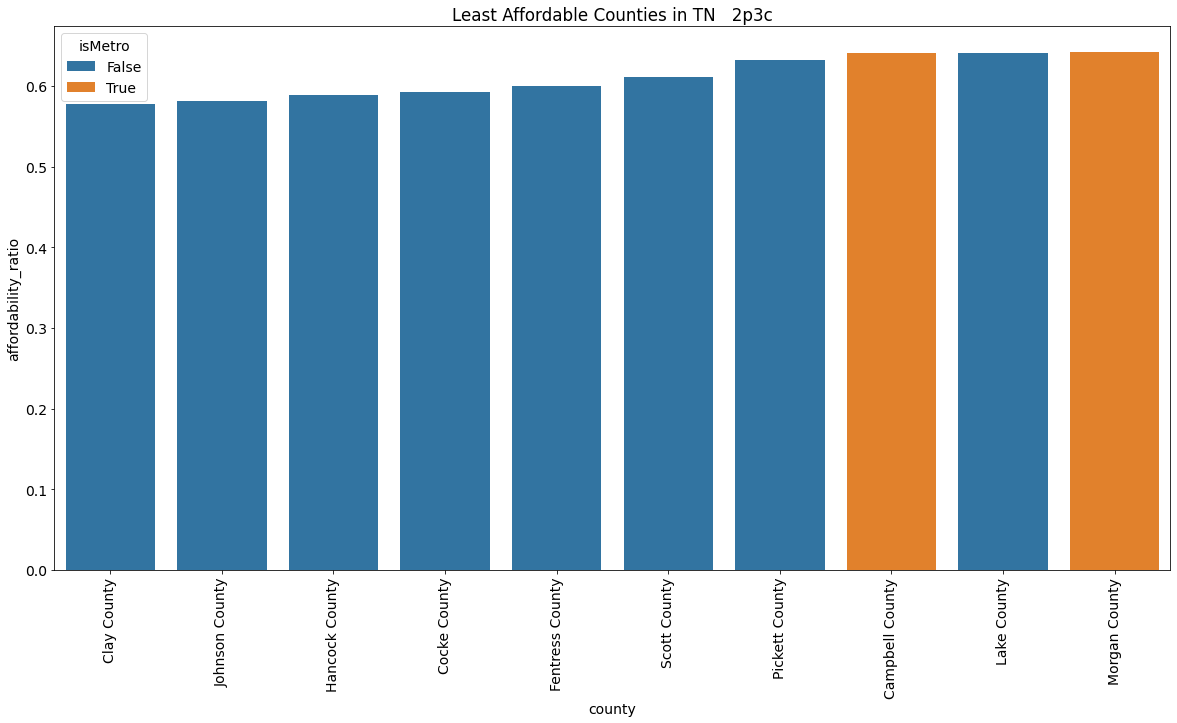

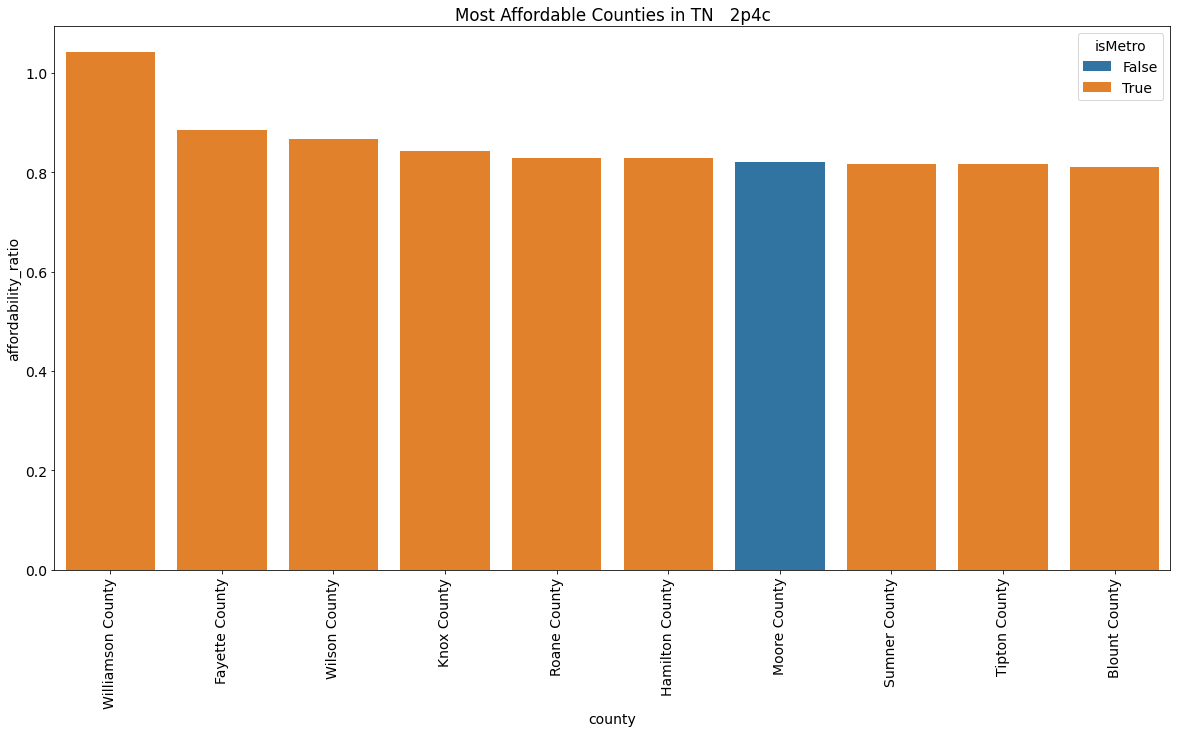

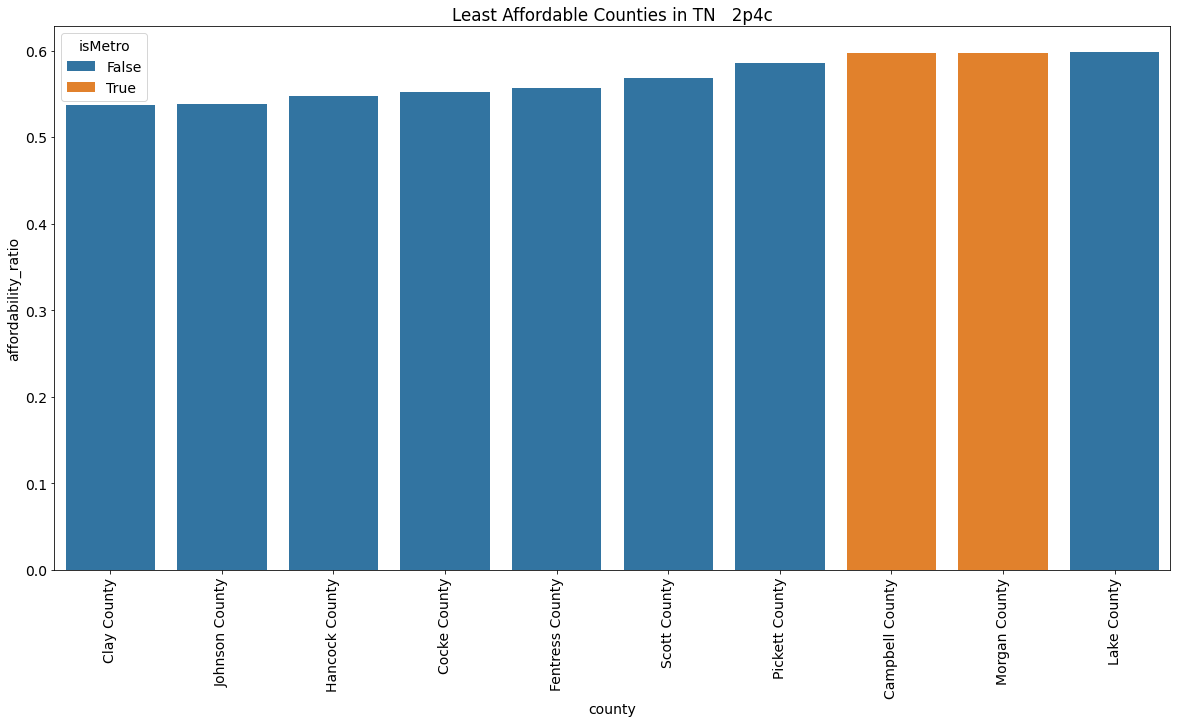

In [154]:
for fs in family_size:
    ds_df = modified_df[(modified_df["family_member_count"] == fs) & (modified_df["state"] == "TN")]
    most_affordable = ds_df.nlargest(10, "affordability_ratio")
    least_affordable = ds_df.nsmallest(10, "affordability_ratio")
    affordability_graphs(most_affordable, "TN", "Most", fs)
    affordability_graphs(least_affordable, "TN", "Least", fs)